#<군산의 네비게이션 검색량 분석>
한국관광데이터랩의 네비게이션 검색량 데이터를 이용해 군산의 방문객들이 주로 어떤 관광지를 방문하는지 분석해 보았습니다.

In [1]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

������ ��θ� ã�� �� �����ϴ�.
Matplotlib is building the font cache; this may take a moment.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
train = pd.read_csv('../data/군산검색량_년도.csv', encoding ='cp949')
train.head()

,기초지자체,구분,2015,2016,2017,2018,2019,2020
0,전라북도 전체,전체,"1,397,727","1,897,986","3,080,096","4,008,849","5,322,220","5,580,440"
1,전라북도 전체,자연관광지,"125,233","159,103","245,540","326,488","403,961","474,215"
2,전라북도 전체,역사관광지,"97,715","112,085","170,041","167,095","198,662","185,390"
3,전라북도 전체,휴양관광지,"40,781","46,412","62,385","77,766","93,877","67,329"
4,전라북도 전체,공연/행사,"18,279","27,601","43,759","63,372","87,656","44,016"


# 연도별 군산의 목적지 검색건수 추이

In [6]:
# 군산시 검색부분 가져오기
new = train.loc[[12,13,14,15,16,17,18,19,20,21],]

# 2015년 - 2021년 전체 추이
nature = train.loc[[12],]
hist = train.loc[[13],]
rest = train.loc[[14],]
show = train.loc[[15],]
cult = train.loc[[16],]
sport = train.loc[[17],]
shop = train.loc[[18],]
food = train.loc[[19],]
sleep = train.loc[[20],]
other = train.loc[[21],]

In [7]:
x = ['2015년','2016년','2017년','2018년','2019년','2020년']
y1 = nature.iloc[:,2:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,2:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,2:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,2:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,2:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,2:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,2:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,2:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,2:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,2:]
y10 = y10.iloc[0,:].values

In [8]:
final = pd.DataFrame({"년도":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })
final

,년도,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
0,2015년,"29,244","8,067",433,971,"7,792","3,287","6,775","166,707","29,664","27,522"
1,2016년,"37,869","10,491",510,"1,291","6,640","4,973","9,424","222,920","38,781","36,297"
2,2017년,"66,160","16,841",618,"2,278","18,125","9,441","18,532","355,487","62,804","56,648"
3,2018년,"119,332","13,900",545,"8,475","21,985","14,998","57,671","460,622","83,374","75,438"
4,2019년,"148,485","15,299",822,"11,793","30,026","20,683","70,979","620,418","107,763","94,293"
5,2020년,"154,807","12,986","1,061","6,340","16,507","24,671","67,705","657,384","116,223","71,486"


In [9]:
import re
final['자연관광지'] = final['자연관광지'].map(lambda x: re.sub(r',', '', x))
final['역사관광지'] = final['역사관광지'].map(lambda x: re.sub(r',', '', x))
final['휴양관광지'] = final['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final['공연/행사'] = final['공연/행사'].map(lambda x: re.sub(r',', '', x))
final['문화시설'] = final['문화시설'].map(lambda x: re.sub(r',', '', x))
final['레포츠(육상/해상/항공)'] = final['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final['쇼핑'] = final['쇼핑'].map(lambda x: re.sub(r',', '', x))
final['식음료'] = final['식음료'].map(lambda x: re.sub(r',', '', x))
final['숙박'] = final['숙박'].map(lambda x: re.sub(r',', '', x))
final['기타관광지'] = final['기타관광지'].map(lambda x: re.sub(r',', '', x))

final['자연관광지'] = final['자연관광지'].apply(pd.to_numeric)
final['역사관광지'] = final['역사관광지'].apply(pd.to_numeric)
final['휴양관광지'] = final['휴양관광지'].apply(pd.to_numeric)
final['공연/행사'] = final['공연/행사'].apply(pd.to_numeric)
final['문화시설'] = final['문화시설'].apply(pd.to_numeric)
final['레포츠(육상/해상/항공)'] = final['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final['쇼핑'] = final['쇼핑'].apply(pd.to_numeric)
final['식음료'] = final['식음료'].apply(pd.to_numeric)
final['숙박'] = final['숙박'].apply(pd.to_numeric)
final['기타관광지'] = final['기타관광지'].apply(pd.to_numeric)

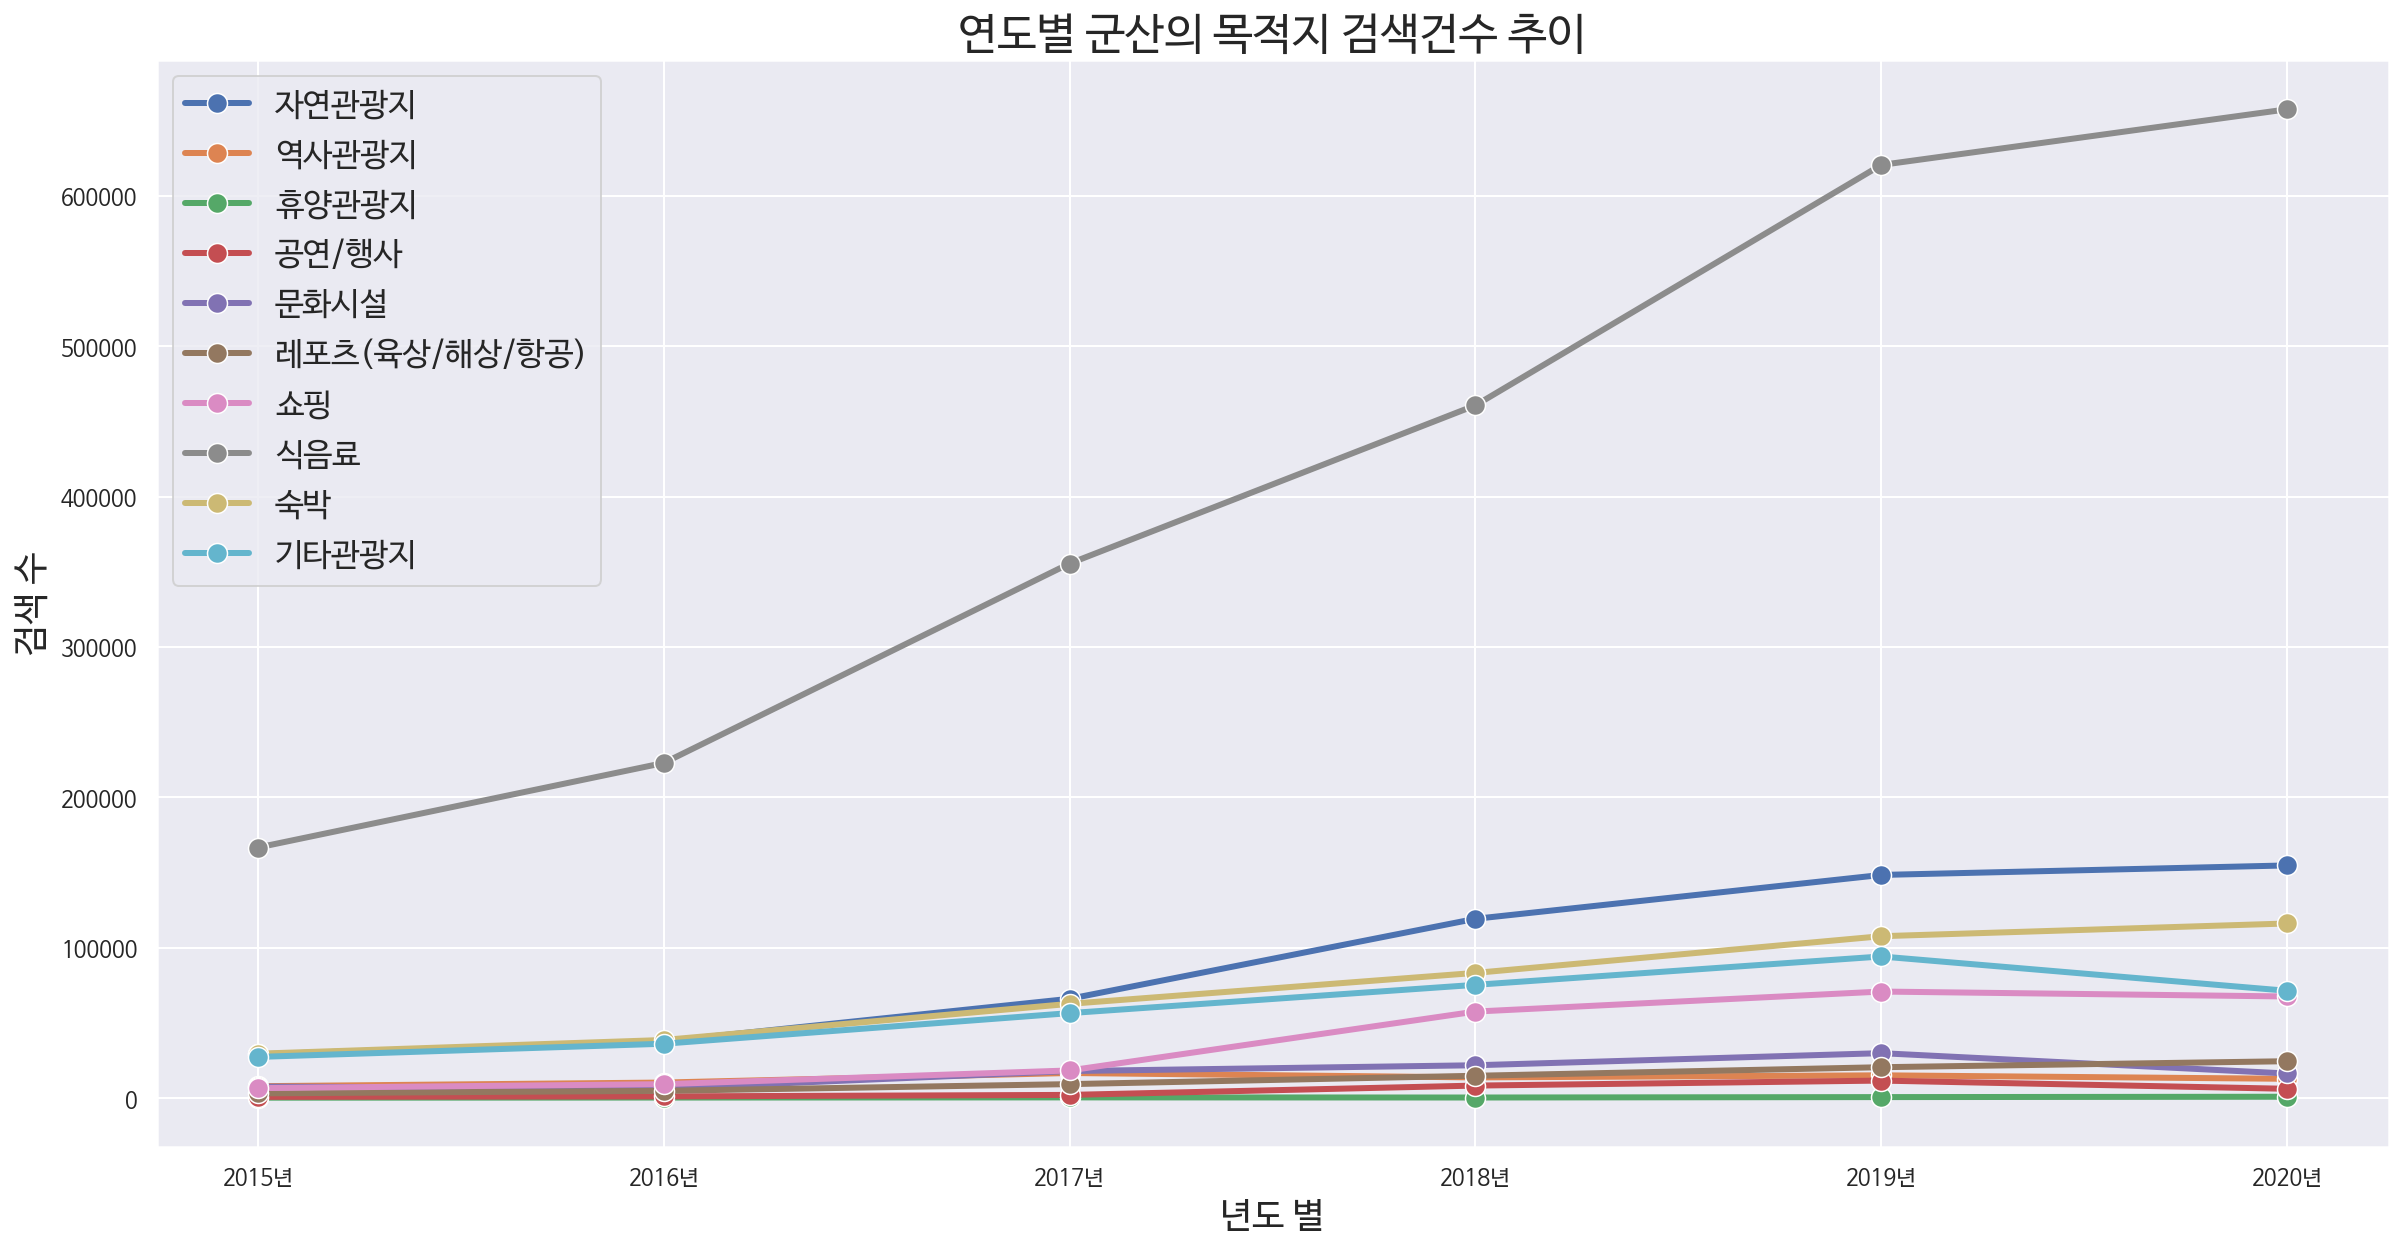

In [10]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.rc('font', family='NanumBarunGothic') 

sns.lineplot(x=final['년도'], y =final['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final['년도'], y =final['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('년도 별', fontsize=18)
plt.ylabel('검색 수', fontsize=18)
plt.title('연도별 군산의 목적지 검색건수 추이', fontsize=22)
plt.legend(final.columns[1:],fontsize=16)
plt.show()

# 년도별- 월별 목적지 검색건수 추이

- 2015년 월별 목적지 검색건수 추이

In [11]:
train2 =pd.read_csv('../data/군산_월별검색량.csv', encoding = 'cp949')
train2.head()

,Unnamed: 0,Unnamed: 1,2015,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,2021,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,기초지자체,구분,1,2,3,4,5,6,7,8,...,9,10,11,12,1,2,3,4,5,6
1,군산시,전체,"17,930","16,507","17,548","20,362","32,665","17,613","24,496","36,974",...,"96,524","122,514","96,458","65,947","64,822","85,504","88,086","97,127","118,245","105,693"
2,군산시,자연관광지,"1,372","1,338","1,749","2,573","4,186","2,007","2,648","4,187",...,"14,940","18,668","11,585","8,733","7,869","10,994","10,973","14,617","17,003","14,458"
3,군산시,역사관광지,668,650,644,572,"1,088",409,650,"1,112",...,832,"1,354","1,105",683,720,"1,137",991,"1,398","1,737","1,313"
4,군산시,휴양관광지,33,14,18,21,94,19,33,60,...,134,242,115,39,55,138,96,130,283,219


In [12]:
first = train2.iloc[2:,1:14]

nature = first.loc[[2],]
hist = first.loc[[3],]
rest = first.loc[[4],]
show = first.loc[[5],]
cult = first.loc[[6],]
sport = first.loc[[7],]
shop = first.loc[[8],]
food = first.loc[[9],]
sleep = first.loc[[10],]
other = first.loc[[11],]

In [13]:
x = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
y1 = nature.iloc[:,1:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,1:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,1:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,1:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,1:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,1:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,1:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,1:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,1:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,1:]
y10 = y10.iloc[0,:].values

final2 = pd.DataFrame({"월":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })

In [14]:
final2['자연관광지'] = final2['자연관광지'].map(lambda x: re.sub(r',', '', x))
final2['역사관광지'] = final2['역사관광지'].map(lambda x: re.sub(r',', '', x))
final2['휴양관광지'] = final2['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final2['공연/행사'] = final2['공연/행사'].map(lambda x: re.sub(r',', '', x))
final2['문화시설'] = final2['문화시설'].map(lambda x: re.sub(r',', '', x))
final2['레포츠(육상/해상/항공)'] = final2['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final2['쇼핑'] = final2['쇼핑'].map(lambda x: re.sub(r',', '', x))
final2['식음료'] = final2['식음료'].map(lambda x: re.sub(r',', '', x))
final2['숙박'] = final2['숙박'].map(lambda x: re.sub(r',', '', x))
final2['기타관광지'] = final2['기타관광지'].map(lambda x: re.sub(r',', '', x))

final2['자연관광지'] = final2['자연관광지'].apply(pd.to_numeric)
final2['역사관광지'] = final2['역사관광지'].apply(pd.to_numeric)
final2['휴양관광지'] = final2['휴양관광지'].apply(pd.to_numeric)
final2['공연/행사'] = final2['공연/행사'].apply(pd.to_numeric)
final2['문화시설'] = final2['문화시설'].apply(pd.to_numeric)
final2['레포츠(육상/해상/항공)'] = final2['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final2['쇼핑'] = final2['쇼핑'].apply(pd.to_numeric)
final2['식음료'] = final2['식음료'].apply(pd.to_numeric)
final2['숙박'] = final2['숙박'].apply(pd.to_numeric)
final2['기타관광지'] = final2['기타관광지'].apply(pd.to_numeric)

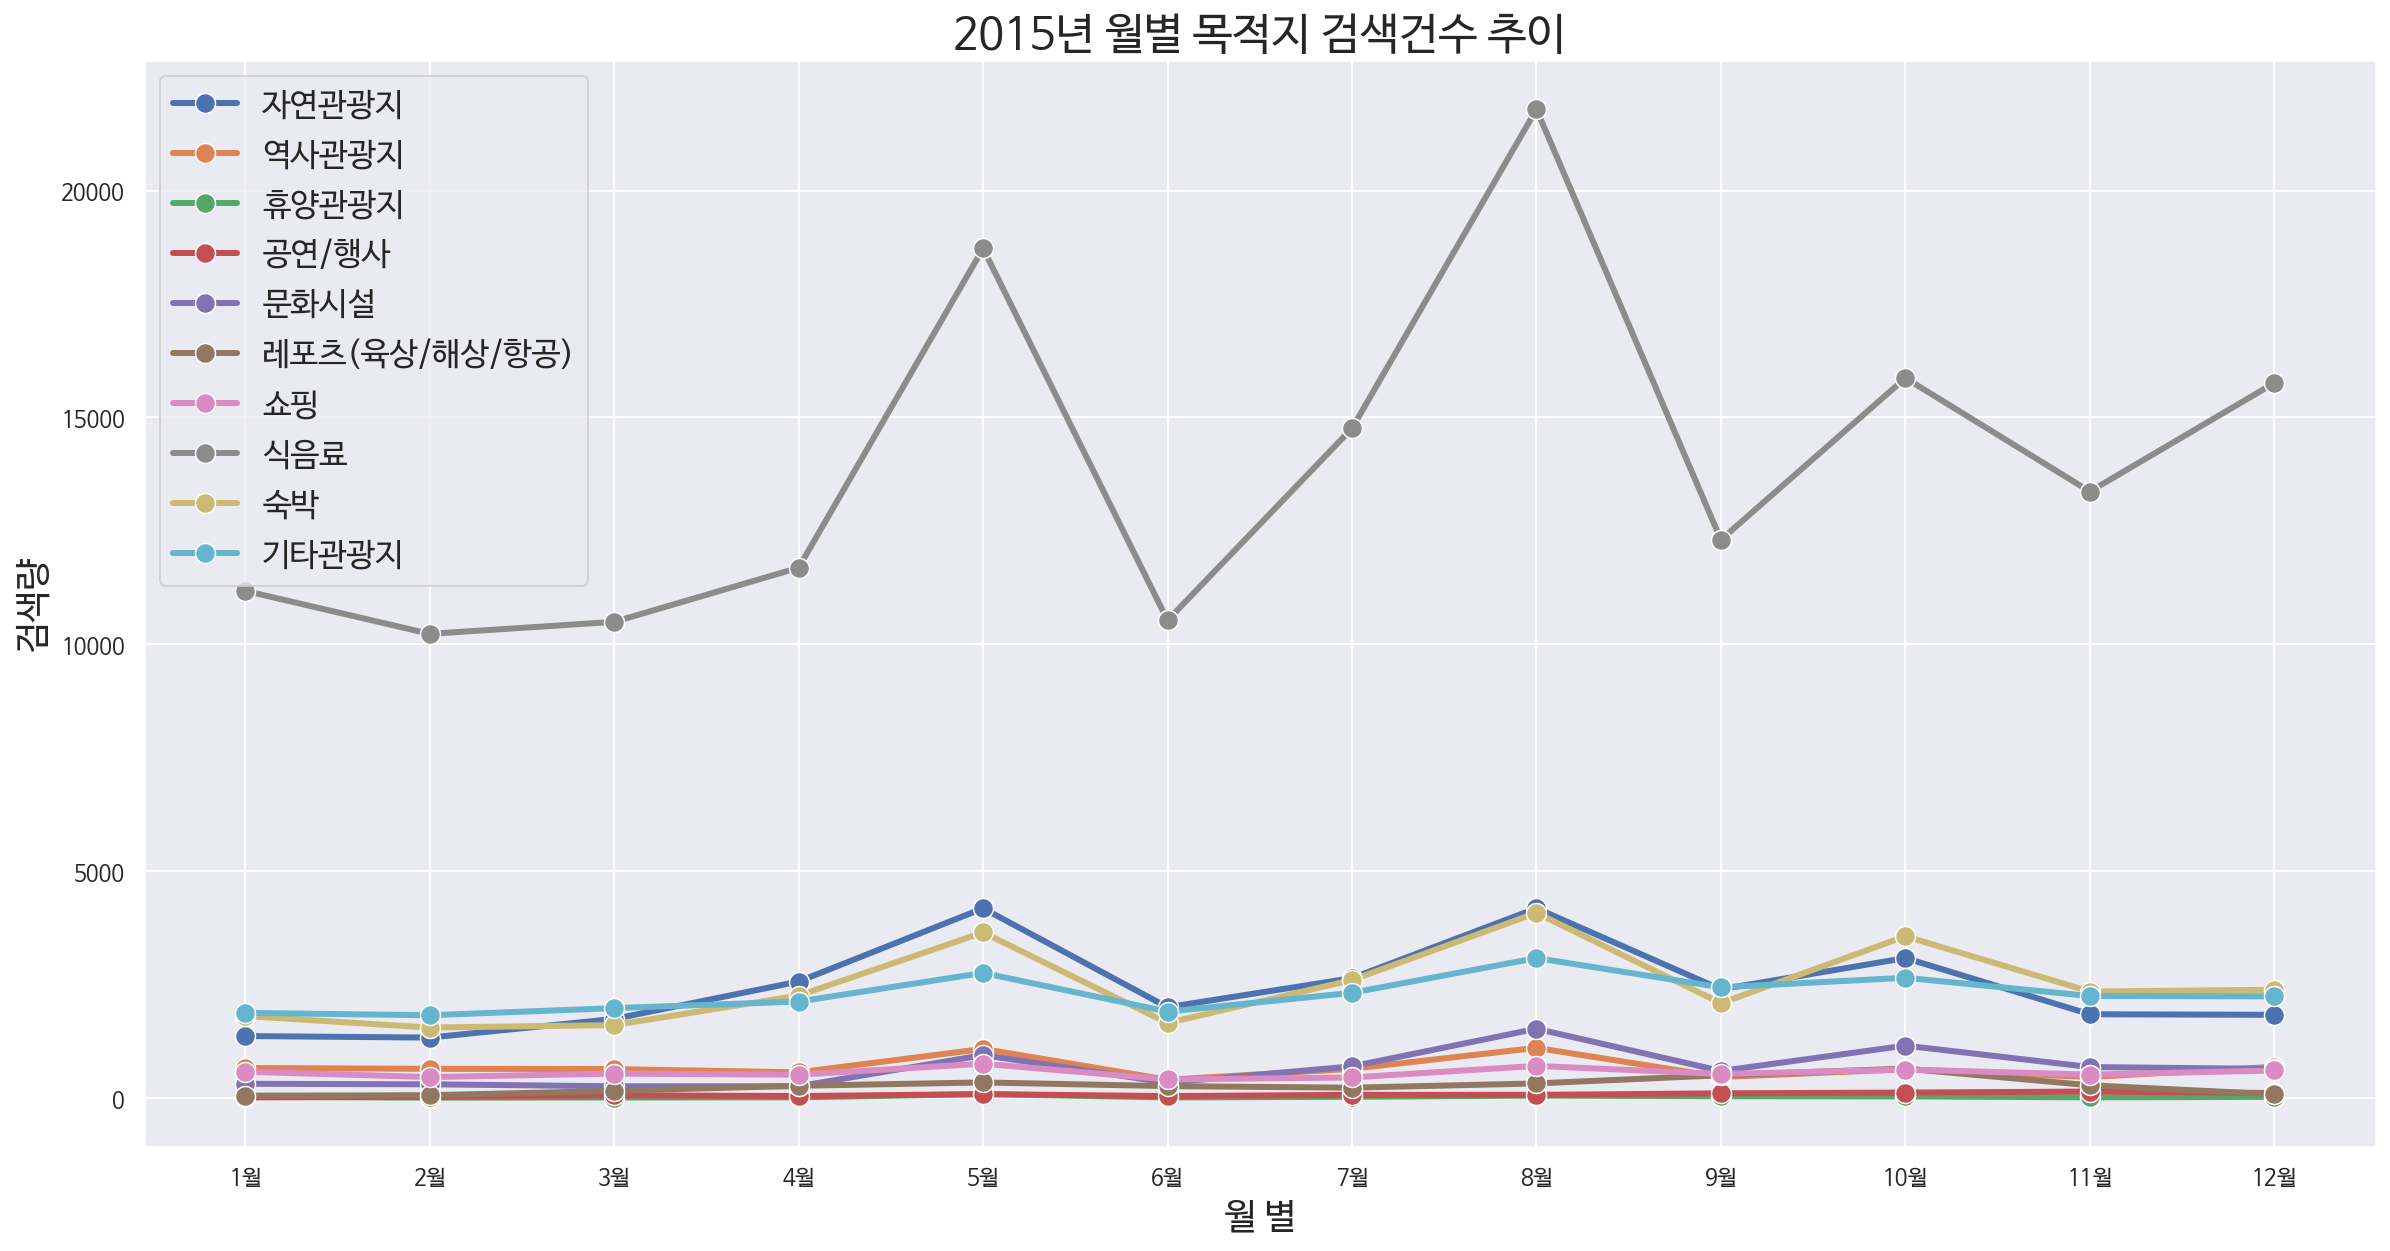

In [15]:
sns.lineplot(x=final2['월'], y =final2['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final2['월'], y =final2['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('2015년 월별 목적지 검색건수 추이', fontsize=22)
plt.legend(final2.columns[1:],fontsize=16)
plt.show()

- 2016년 월별 목적지 검색건수 추이

In [16]:
train2 = train2.set_index('Unnamed: 1')
second = train2.iloc[2:,13:25]

nature = second.iloc[[0],]
hist = second.iloc[[1],]
rest = second.iloc[[2],]
show = second.iloc[[3],]
cult = second.iloc[[4],]
sport = second.iloc[[5],]
shop = second.iloc[[6],]
food = second.iloc[[7],]
sleep = second.iloc[[8],]
other = second.iloc[[9],]

In [17]:
y1 = nature.iloc[:,0:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,0:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,0:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,0:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,0:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,0:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,0:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,0:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,0:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,0:]
y10 = y10.iloc[0,:].values

final3 = pd.DataFrame({"월":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })
final3

,월,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
0,1월,"1,719",786,28,42,676,55,724,"14,911","2,084","2,223"
1,2월,"1,802",778,25,67,737,78,719,"15,646","2,690","2,674"
2,3월,"2,022",632,25,72,326,227,644,"13,812","1,961","2,367"
3,4월,"3,730",687,44,99,378,363,776,"16,459","2,960","2,849"
4,5월,"4,094",912,81,104,537,541,860,"19,730","3,384","2,994"
5,6월,"3,458",813,49,92,486,475,729,"17,081","2,867","2,710"
6,7월,"3,583",833,42,110,575,324,713,"19,271","3,226","3,192"
7,8월,"4,674","1,430",56,84,"1,090",517,853,"27,936","5,200","4,116"
8,9월,"3,146",777,52,98,438,728,764,"17,565","2,828","3,078"
9,10월,"4,239","1,011",46,159,339,761,823,"21,522","4,330","3,536"


In [18]:
final3['자연관광지'] = final3['자연관광지'].map(lambda x: re.sub(r',', '', x))
final3['역사관광지'] = final3['역사관광지'].map(lambda x: re.sub(r',', '', x))
final3['휴양관광지'] = final3['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final3['공연/행사'] = final3['공연/행사'].map(lambda x: re.sub(r',', '', x))
final3['문화시설'] = final3['문화시설'].map(lambda x: re.sub(r',', '', x))
final3['레포츠(육상/해상/항공)'] = final3['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final3['쇼핑'] = final3['쇼핑'].map(lambda x: re.sub(r',', '', x))
final3['식음료'] = final3['식음료'].map(lambda x: re.sub(r',', '', x))
final3['숙박'] = final3['숙박'].map(lambda x: re.sub(r',', '', x))
final3['기타관광지'] = final3['기타관광지'].map(lambda x: re.sub(r',', '', x))

final3['자연관광지'] = final3['자연관광지'].apply(pd.to_numeric)
final3['역사관광지'] = final3['역사관광지'].apply(pd.to_numeric)
final3['휴양관광지'] = final3['휴양관광지'].apply(pd.to_numeric)
final3['공연/행사'] = final3['공연/행사'].apply(pd.to_numeric)
final3['문화시설'] = final3['문화시설'].apply(pd.to_numeric)
final3['레포츠(육상/해상/항공)'] = final3['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final3['쇼핑'] = final3['쇼핑'].apply(pd.to_numeric)
final3['식음료'] = final3['식음료'].apply(pd.to_numeric)
final3['숙박'] = final3['숙박'].apply(pd.to_numeric)
final3['기타관광지'] = final3['기타관광지'].apply(pd.to_numeric)

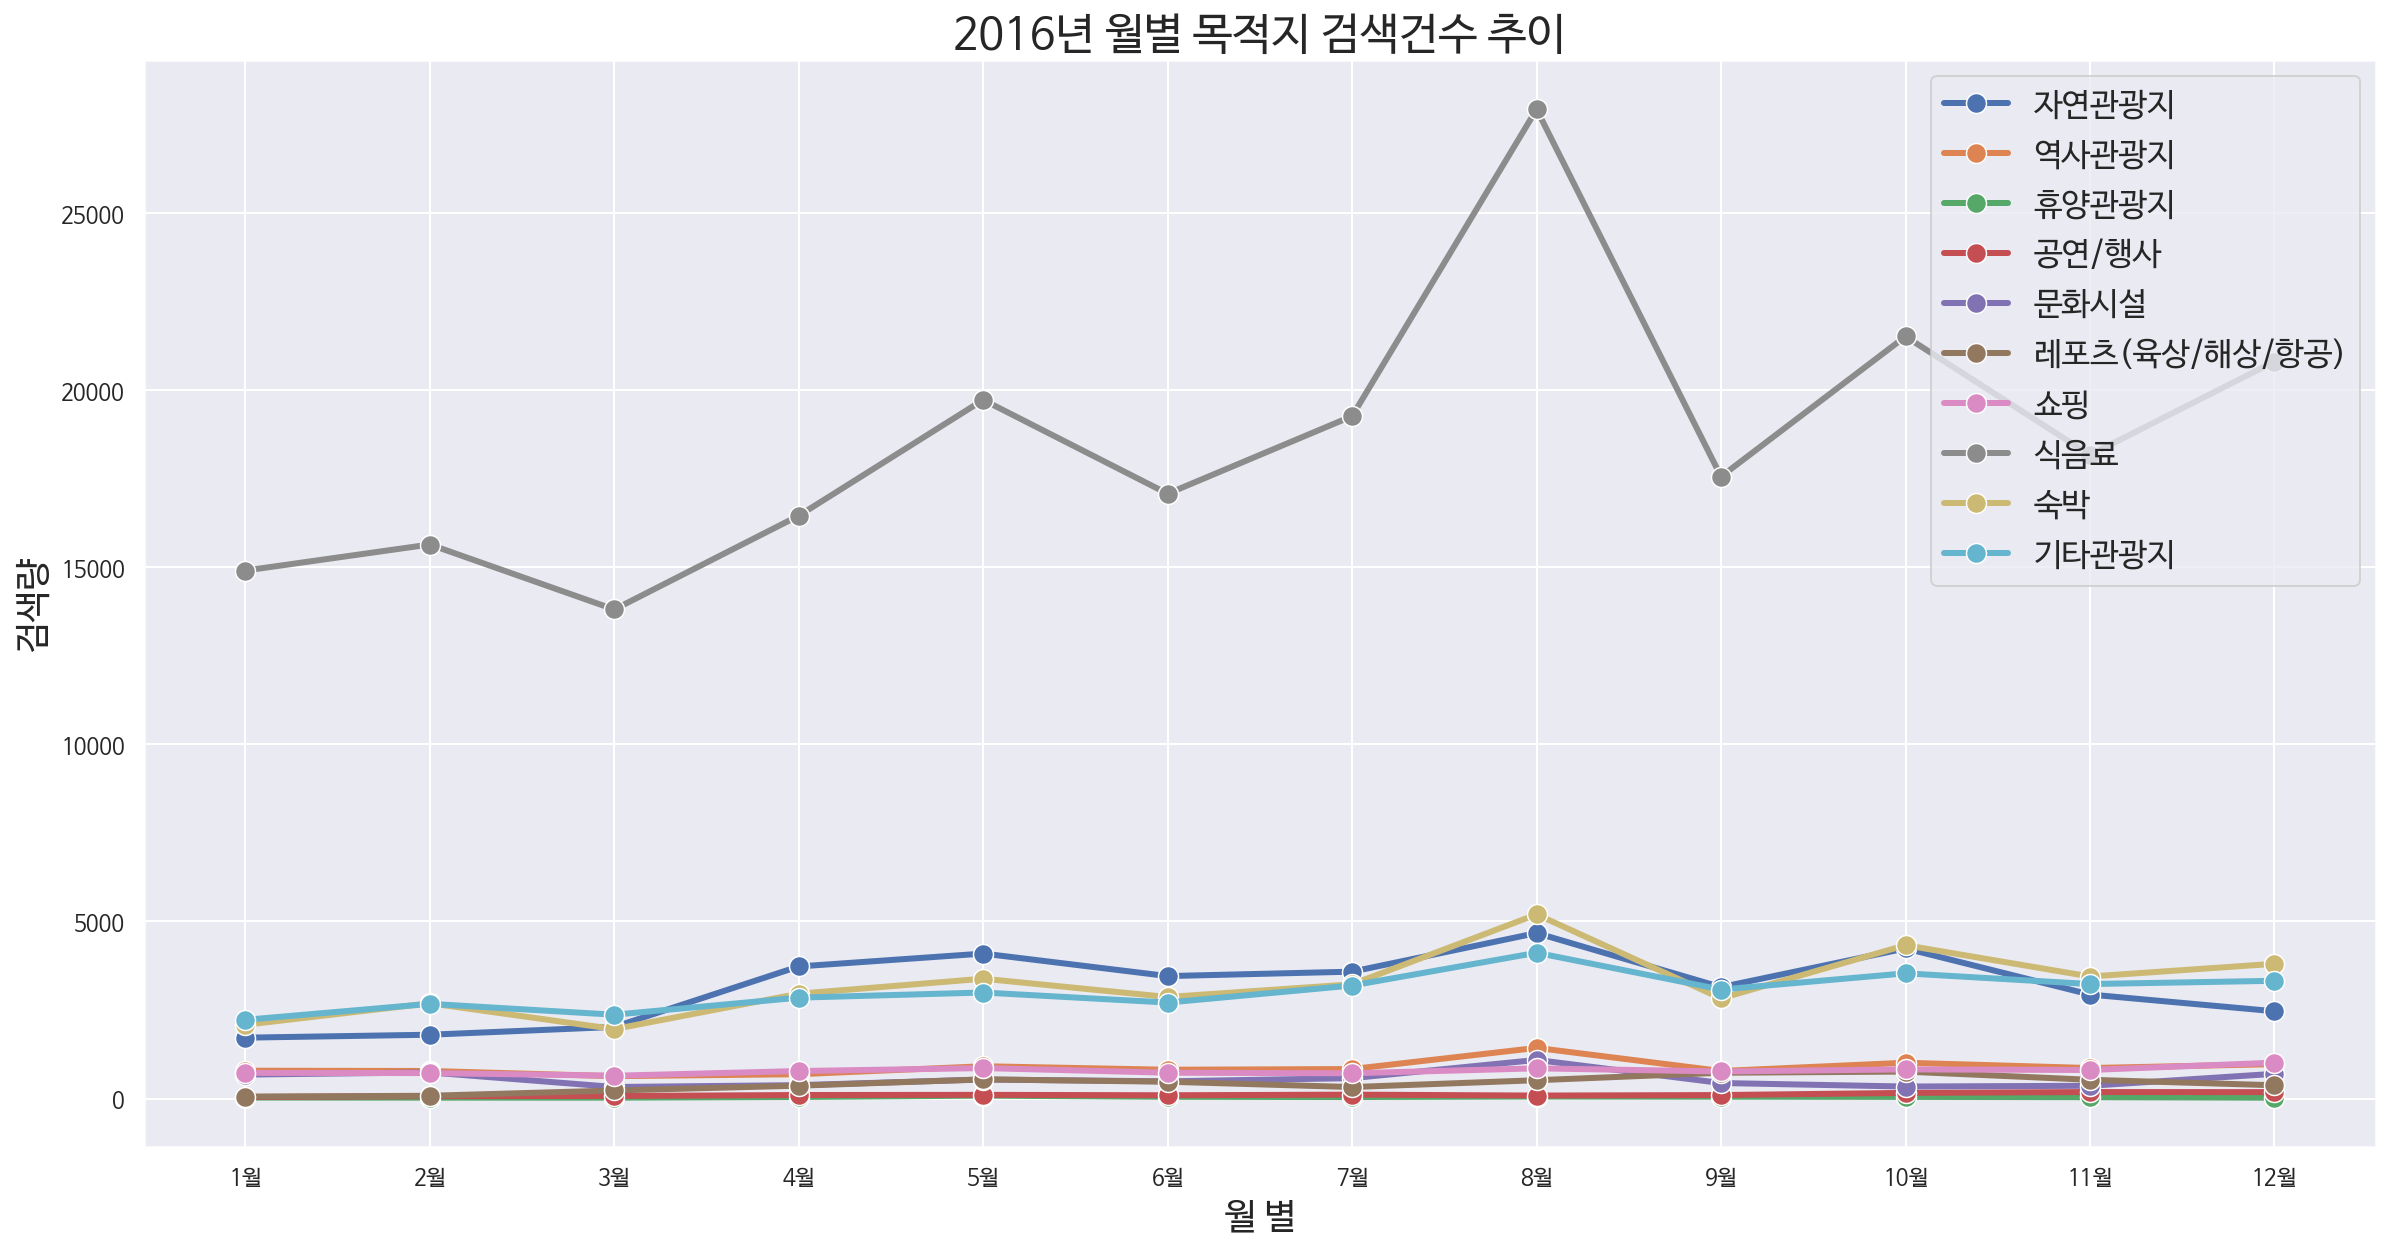

In [19]:
sns.lineplot(x=final3['월'], y =final3['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final3['월'], y =final3['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('2016년 월별 목적지 검색건수 추이', fontsize=22)
plt.legend(final3.columns[1:],fontsize=16)
plt.show()

- 2017년 월별 목적지 검색량 추이

In [20]:
third = train2.iloc[2:,25:37]

nature = third.iloc[[0],]
hist = third.iloc[[1],]
rest = third.iloc[[2],]
show = third.iloc[[3],]
cult = third.iloc[[4],]
sport = third.iloc[[5],]
shop = third.iloc[[6],]
food = third.iloc[[7],]
sleep = third.iloc[[8],]
other = third.iloc[[9],]

In [21]:
y1 = nature.iloc[:,0:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,0:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,0:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,0:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,0:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,0:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,0:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,0:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,0:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,0:]
y10 = y10.iloc[0,:].values

final4 = pd.DataFrame({"월":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })
final4

,월,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
0,1월,"2,437","1,276",35,62,"1,237",444,"1,127","21,733","3,172","3,395"
1,2월,"2,580","1,411",28,94,"1,524",330,"1,044","23,195","4,459","3,665"
2,3월,"3,255","1,100",58,170,"1,292",399,"1,110","23,482","3,578","3,716"
3,4월,"6,536","1,251",86,125,"1,281",658,"1,484","27,152","5,050","4,311"
4,5월,"7,894","1,955",79,140,"1,989",883,"1,776","36,466","6,432","5,356"
5,6월,"5,506","1,218",41,174,"1,219",825,"1,235","26,589","4,437","4,252"
6,7월,"5,189","1,215",31,172,"1,520",540,"1,509","28,544","4,936","4,638"
7,8월,"8,268","2,055",51,136,"3,035",942,"2,070","38,656","7,052","5,839"
8,9월,"6,149","1,139",61,235,"1,268","1,353","1,843","28,163","5,003","4,496"
9,10월,"9,196","1,926",101,198,"1,805","1,713","2,246","39,944","7,435","6,575"


In [22]:
final4['자연관광지'] = final4['자연관광지'].map(lambda x: re.sub(r',', '', x))
final4['역사관광지'] = final4['역사관광지'].map(lambda x: re.sub(r',', '', x))
final4['휴양관광지'] = final4['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final4['공연/행사'] = final4['공연/행사'].map(lambda x: re.sub(r',', '', x))
final4['문화시설'] = final4['문화시설'].map(lambda x: re.sub(r',', '', x))
final4['레포츠(육상/해상/항공)'] = final4['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final4['쇼핑'] = final4['쇼핑'].map(lambda x: re.sub(r',', '', x))
final4['식음료'] = final4['식음료'].map(lambda x: re.sub(r',', '', x))
final4['숙박'] = final4['숙박'].map(lambda x: re.sub(r',', '', x))
final4['기타관광지'] = final4['기타관광지'].map(lambda x: re.sub(r',', '', x))

final4['자연관광지'] = final4['자연관광지'].apply(pd.to_numeric)
final4['역사관광지'] = final4['역사관광지'].apply(pd.to_numeric)
final4['휴양관광지'] = final4['휴양관광지'].apply(pd.to_numeric)
final4['공연/행사'] = final4['공연/행사'].apply(pd.to_numeric)
final4['문화시설'] = final4['문화시설'].apply(pd.to_numeric)
final4['레포츠(육상/해상/항공)'] = final4['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final4['쇼핑'] = final4['쇼핑'].apply(pd.to_numeric)
final4['식음료'] = final4['식음료'].apply(pd.to_numeric)
final4['숙박'] = final4['숙박'].apply(pd.to_numeric)
final4['기타관광지'] = final4['기타관광지'].apply(pd.to_numeric)

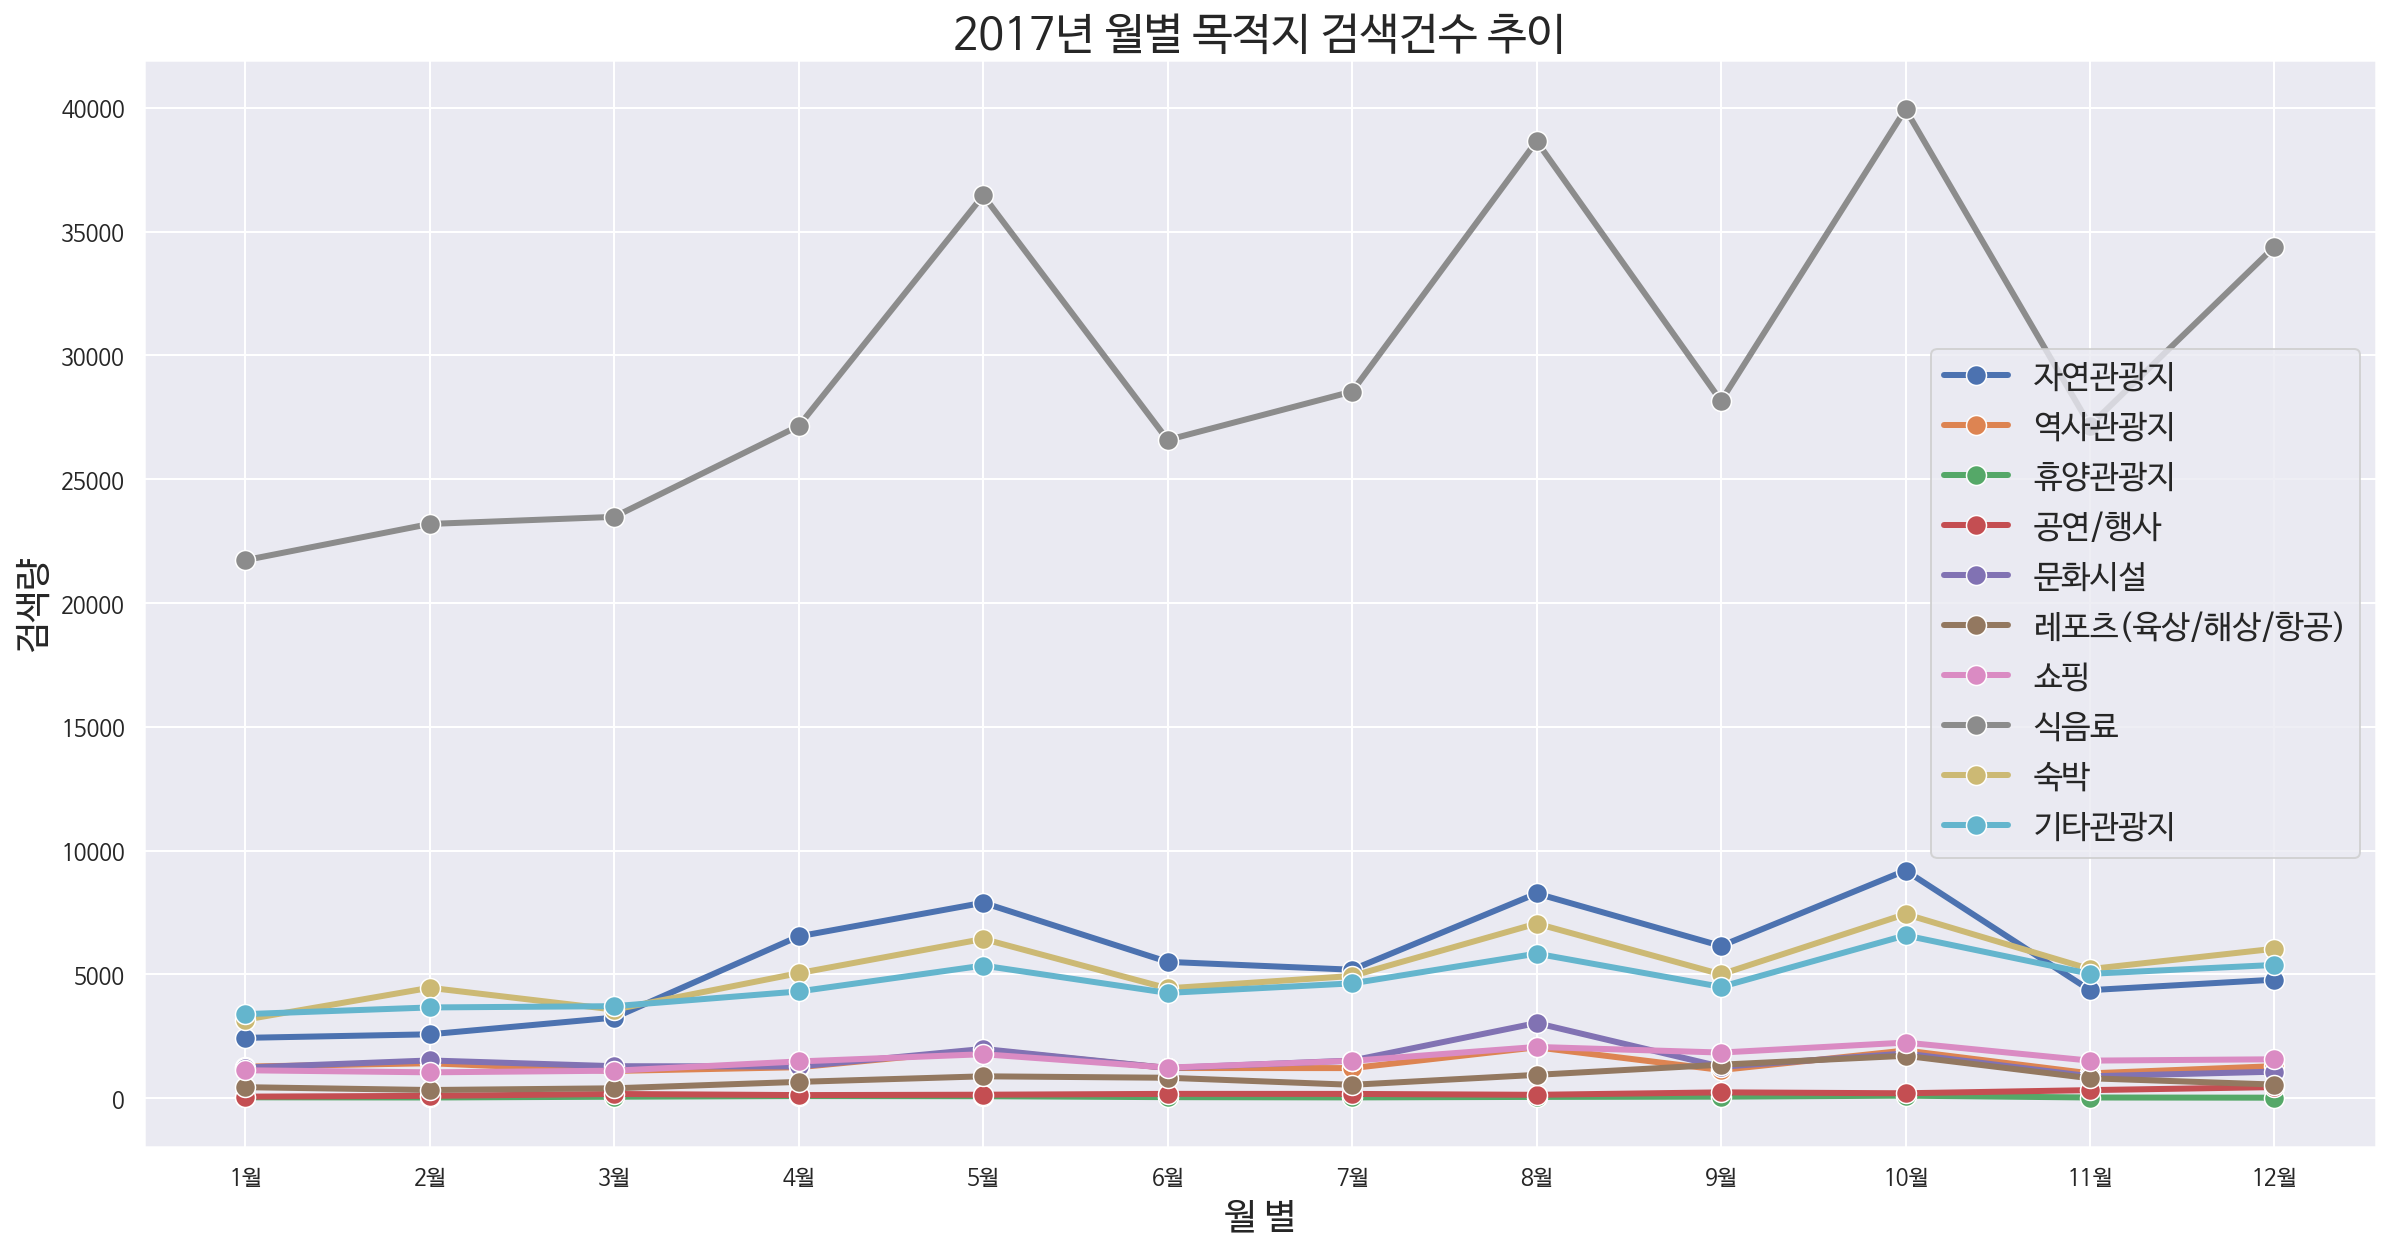

In [23]:
sns.lineplot(x=final4['월'], y =final4['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final4['월'], y =final4['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('2017년 월별 목적지 검색건수 추이', fontsize=22)
plt.legend(final4.columns[1:],fontsize=16)
plt.show()

- 2018년 월별 목적지 검색량 추이

In [24]:
fourth = train2.iloc[2:,37:49]

nature = fourth.iloc[[0],]
hist = fourth.iloc[[1],]
rest = fourth.iloc[[2],]
show = fourth.iloc[[3],]
cult = fourth.iloc[[4],]
sport = fourth.iloc[[5],]
shop = fourth.iloc[[6],]
food = fourth.iloc[[7],]
sleep = fourth.iloc[[8],]
other = fourth.iloc[[9],]

In [25]:
y1 = nature.iloc[:,0:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,0:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,0:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,0:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,0:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,0:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,0:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,0:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,0:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,0:]
y10 = y10.iloc[0,:].values

final5 = pd.DataFrame({"월":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })
final5

,월,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
0,1월,"6,802","1,098",21,233,"1,033",543,"1,366","29,643","4,851","5,273"
1,2월,"6,482","1,194",20,323,"1,459",466,"1,678","30,758","5,310","5,485"
2,3월,"8,739","1,253",53,433,"1,699",789,"2,110","35,023","5,484","5,528"
3,4월,"11,078","1,153",45,398,"1,690",978,"3,976","36,253","6,558","6,243"
4,5월,"12,641","1,406",84,699,"2,379","1,348","9,116","44,179","7,671","6,635"
5,6월,"10,871",989,54,655,"1,665","1,205","5,430","35,253","6,249","6,474"
6,7월,"9,782",969,29,797,"1,950","1,192","5,730","39,382","7,148","6,568"
7,8월,"13,272","1,550",36,"1,291","3,221","1,324","6,464","50,696","9,583","7,210"
8,9월,"12,281","1,077",67,872,"1,666","2,292","5,996","39,214","6,823","6,941"
9,10월,"12,205","1,102",73,747,"1,954","2,298","5,288","41,438","10,087","7,151"


In [26]:
final5['자연관광지'] = final5['자연관광지'].map(lambda x: re.sub(r',', '', x))
final5['역사관광지'] = final5['역사관광지'].map(lambda x: re.sub(r',', '', x))
final5['휴양관광지'] = final5['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final5['공연/행사'] = final5['공연/행사'].map(lambda x: re.sub(r',', '', x))
final5['문화시설'] = final5['문화시설'].map(lambda x: re.sub(r',', '', x))
final5['레포츠(육상/해상/항공)'] = final5['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final5['쇼핑'] = final5['쇼핑'].map(lambda x: re.sub(r',', '', x))
final5['식음료'] = final5['식음료'].map(lambda x: re.sub(r',', '', x))
final5['숙박'] = final5['숙박'].map(lambda x: re.sub(r',', '', x))
final5['기타관광지'] = final5['기타관광지'].map(lambda x: re.sub(r',', '', x))

final5['자연관광지'] = final5['자연관광지'].apply(pd.to_numeric)
final5['역사관광지'] = final5['역사관광지'].apply(pd.to_numeric)
final5['휴양관광지'] = final5['휴양관광지'].apply(pd.to_numeric)
final5['공연/행사'] = final5['공연/행사'].apply(pd.to_numeric)
final5['문화시설'] = final5['문화시설'].apply(pd.to_numeric)
final5['레포츠(육상/해상/항공)'] = final5['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final5['쇼핑'] = final5['쇼핑'].apply(pd.to_numeric)
final5['식음료'] = final5['식음료'].apply(pd.to_numeric)
final5['숙박'] = final5['숙박'].apply(pd.to_numeric)
final5['기타관광지'] = final5['기타관광지'].apply(pd.to_numeric)

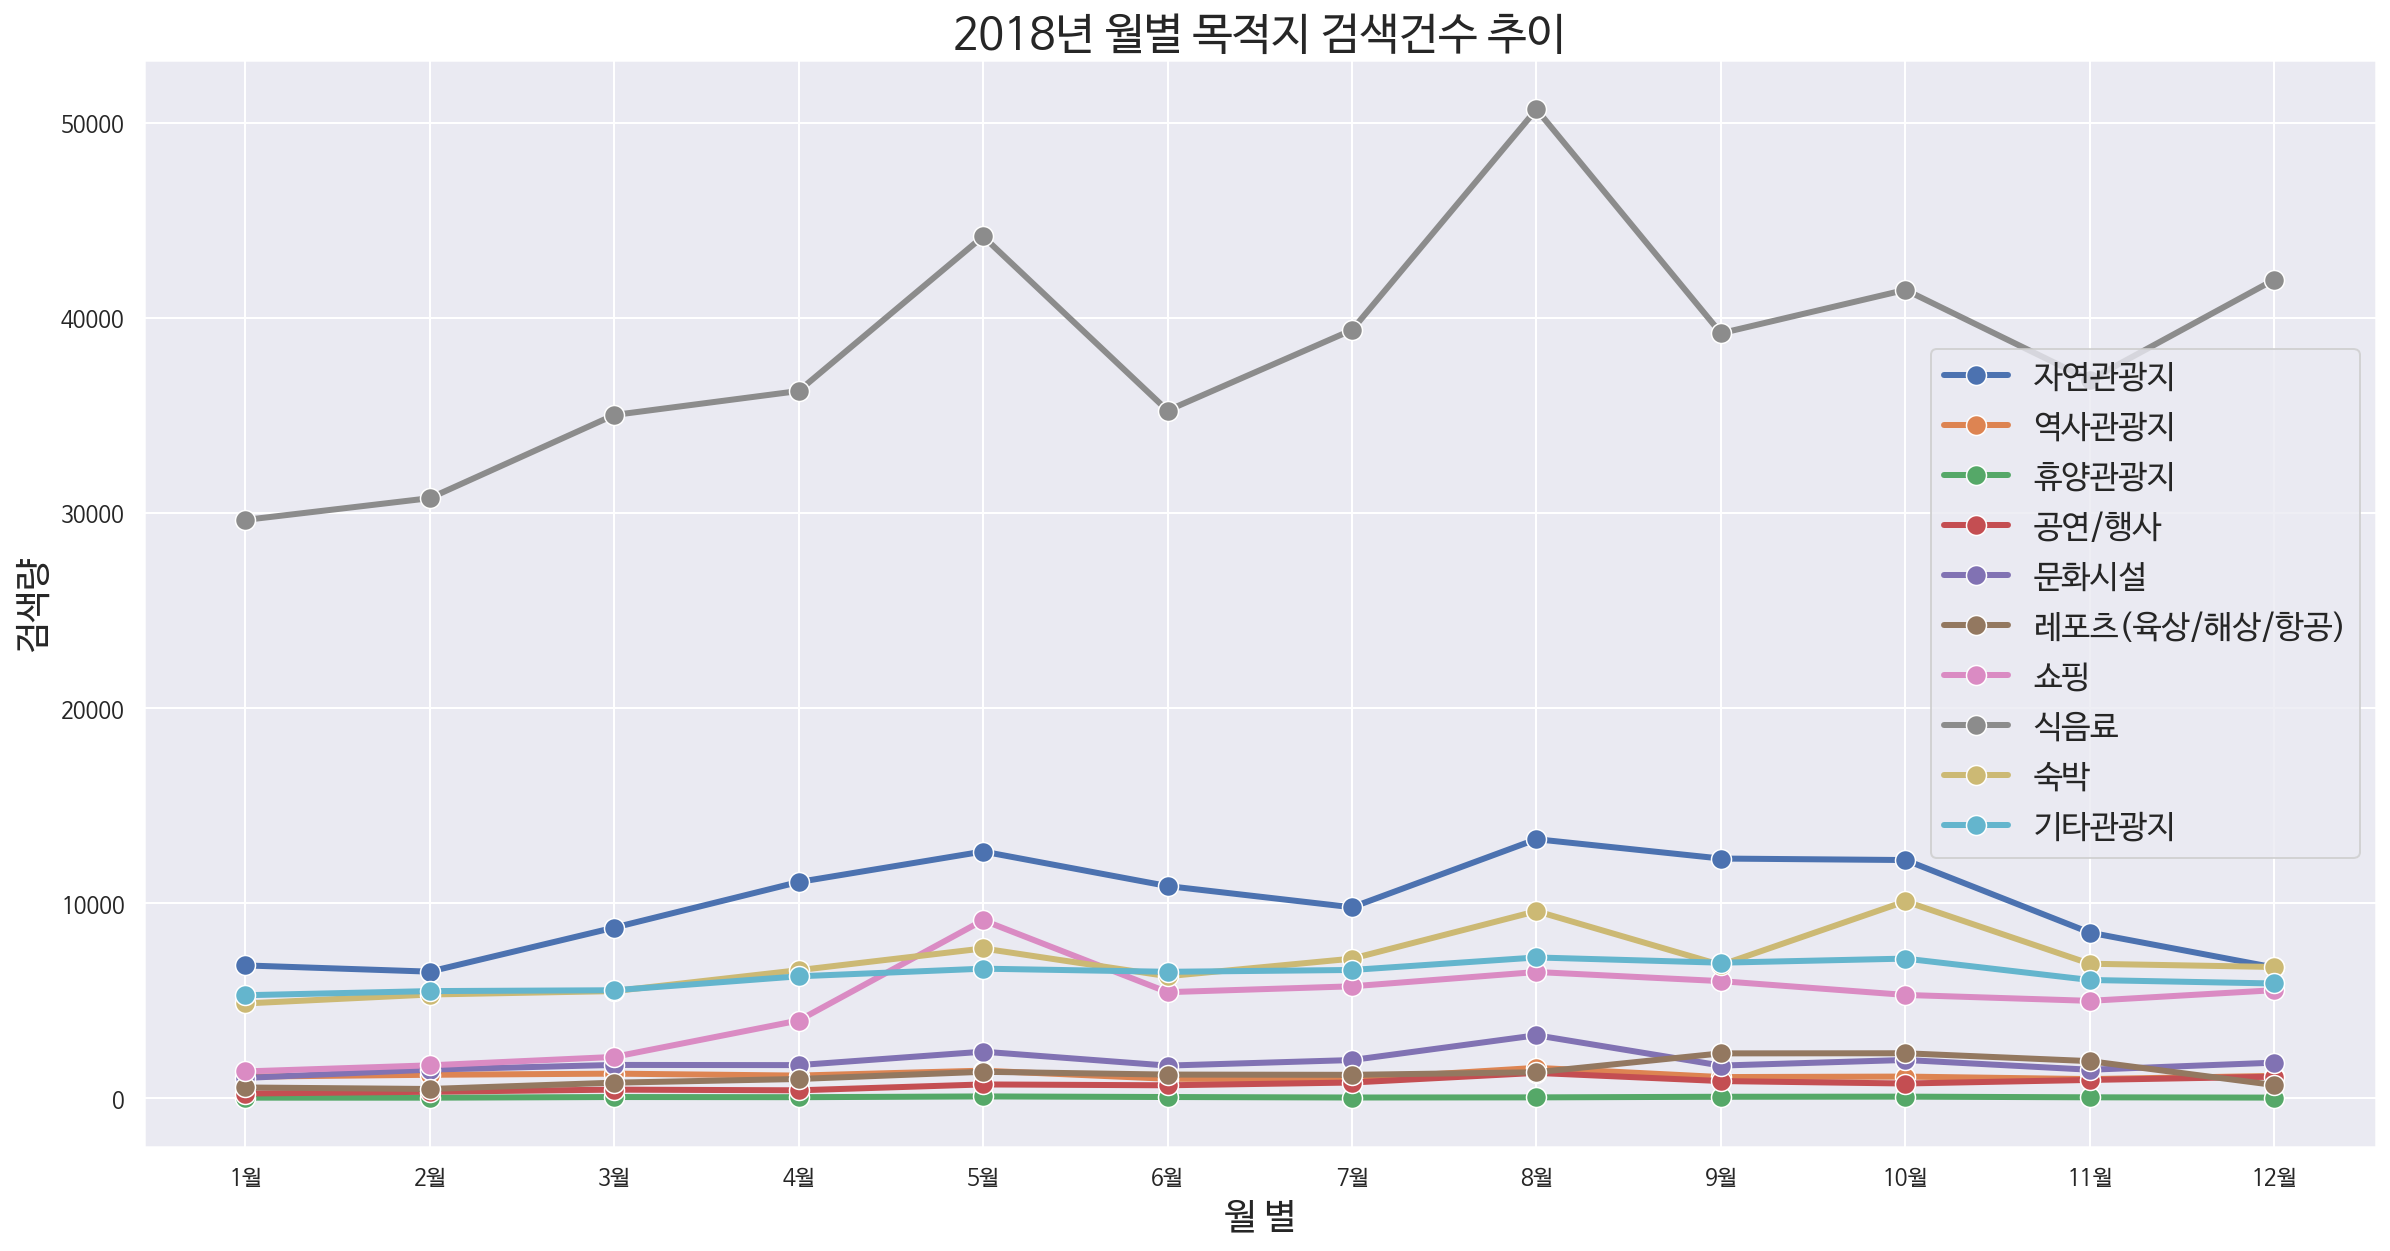

In [27]:
sns.lineplot(x=final5['월'], y =final5['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final5['월'], y =final5['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('2018년 월별 목적지 검색건수 추이', fontsize=22)
plt.legend(final5.columns[1:],fontsize=16)
plt.show()

- 2019년 월별 목적지 검색량 추이

In [28]:
fifth = train2.iloc[2:,49:61]

nature = fifth.iloc[[0],]
hist = fifth.iloc[[1],]
rest = fifth.iloc[[2],]
show = fifth.iloc[[3],]
cult = fifth.iloc[[4],]
sport = fifth.iloc[[5],]
shop = fifth.iloc[[6],]
food = fifth.iloc[[7],]
sleep = fifth.iloc[[8],]
other = fifth.iloc[[9],]

In [29]:
y1 = nature.iloc[:,0:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,0:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,0:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,0:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,0:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,0:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,0:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,0:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,0:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,0:]
y10 = y10.iloc[0,:].values

final6 = pd.DataFrame({"월":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })
final6

,월,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
0,1월,"6,797","1,128",39,744,"2,026",586,"4,942","40,267","5,294","5,910"
1,2월,"8,930","1,670",40,"1,088","2,674",521,"5,644","45,384","7,744","7,307"
2,3월,"9,712","1,530",75,786,"2,478",907,"5,639","48,365","7,344","6,897"
3,4월,"13,400","1,218",64,801,"1,793","1,407","4,919","44,123","7,580","7,347"
4,5월,"13,131","1,433",94,997,"2,426","1,594","5,931","51,529","9,731","8,512"
5,6월,"12,355","1,256",101,"1,099","2,396","1,745","5,603","50,780","9,164","7,839"
6,7월,"12,127","1,148",49,946,"2,438","1,298","5,600","51,059","8,702","7,821"
7,8월,"21,384","1,686",81,"1,087","4,472","2,641","6,856","69,112","13,259","10,575"
8,9월,"11,877",772,75,879,"1,828","2,682","6,073","45,050","7,413","7,506"
9,10월,"17,606","1,241",104,951,"2,971","3,902","6,719","64,075","11,553","8,634"


In [30]:
final6['자연관광지'] = final6['자연관광지'].map(lambda x: re.sub(r',', '', x))
final6['역사관광지'] = final6['역사관광지'].map(lambda x: re.sub(r',', '', x))
final6['휴양관광지'] = final6['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final6['공연/행사'] = final6['공연/행사'].map(lambda x: re.sub(r',', '', x))
final6['문화시설'] = final6['문화시설'].map(lambda x: re.sub(r',', '', x))
final6['레포츠(육상/해상/항공)'] = final6['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final6['쇼핑'] = final6['쇼핑'].map(lambda x: re.sub(r',', '', x))
final6['식음료'] = final6['식음료'].map(lambda x: re.sub(r',', '', x))
final6['숙박'] = final6['숙박'].map(lambda x: re.sub(r',', '', x))
final6['기타관광지'] = final6['기타관광지'].map(lambda x: re.sub(r',', '', x))

final6['자연관광지'] = final6['자연관광지'].apply(pd.to_numeric)
final6['역사관광지'] = final6['역사관광지'].apply(pd.to_numeric)
final6['휴양관광지'] = final6['휴양관광지'].apply(pd.to_numeric)
final6['공연/행사'] = final6['공연/행사'].apply(pd.to_numeric)
final6['문화시설'] = final6['문화시설'].apply(pd.to_numeric)
final6['레포츠(육상/해상/항공)'] = final6['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final6['쇼핑'] = final6['쇼핑'].apply(pd.to_numeric)
final6['식음료'] = final6['식음료'].apply(pd.to_numeric)
final6['숙박'] = final6['숙박'].apply(pd.to_numeric)
final6['기타관광지'] = final6['기타관광지'].apply(pd.to_numeric)

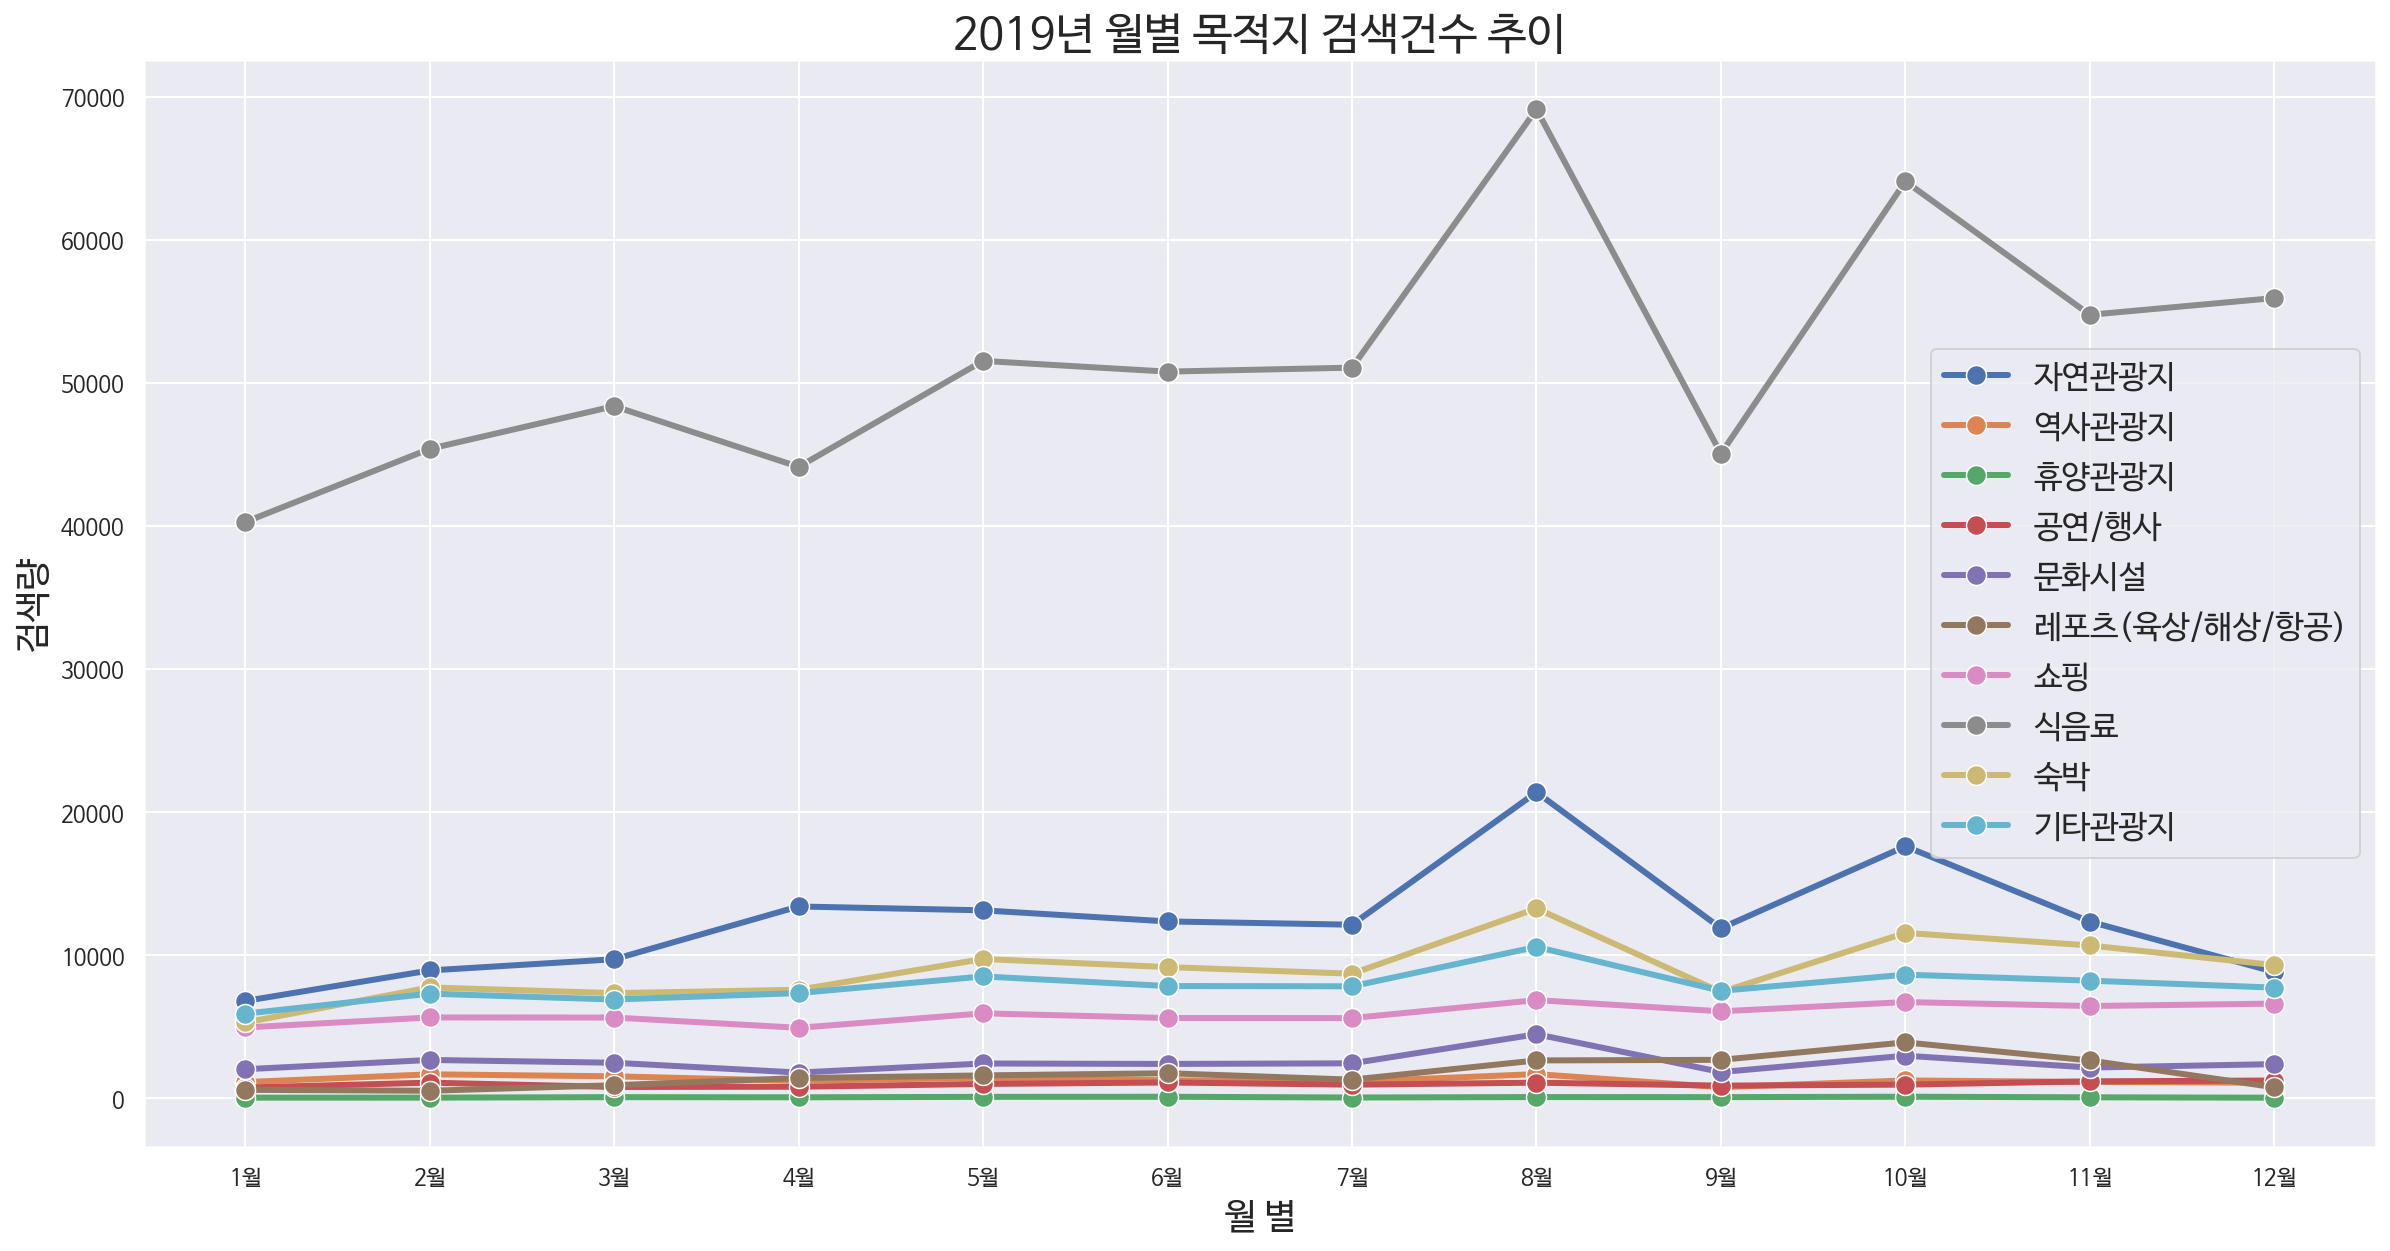

In [31]:
sns.lineplot(x=final6['월'], y =final6['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final6['월'], y =final6['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('2019년 월별 목적지 검색건수 추이', fontsize=22)
plt.legend(final6.columns[1:],fontsize=16)
plt.show()

- 2020년 월별 목적지 검색량 추이

In [32]:
six = train2.iloc[2:,61:73]

nature = six.iloc[[0],]
hist = six.iloc[[1],]
rest = six.iloc[[2],]
show = six.iloc[[3],]
cult = six.iloc[[4],]
sport = six.iloc[[5],]
shop = six.iloc[[6],]
food = six.iloc[[7],]
sleep = six.iloc[[8],]
other = six.iloc[[9],]

In [33]:
y1 = nature.iloc[:,0:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,0:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,0:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,0:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,0:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,0:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,0:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,0:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,0:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,0:]
y10 = y10.iloc[0,:].values

final7 = pd.DataFrame({"월":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })
final7

,월,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
0,1월,"8,939","1,096",43,"1,008","2,521",764,"6,106","51,578","6,991","8,031"
1,2월,"5,480",555,19,417,740,513,"3,046","31,532","4,334","4,464"
2,3월,"10,364",642,33,310,540,609,"4,016","39,537","4,945","4,326"
3,4월,"13,872","1,006",51,336,769,891,"5,234","52,418","7,091","4,951"
4,5월,"18,331","1,519",78,385,"1,881","1,726","7,465","71,890","10,546","6,757"
5,6월,"13,072","1,061",105,475,"1,395","2,032","5,927","58,080","10,209","5,481"
6,7월,"12,537","1,120",105,651,"1,510","2,087","5,634","61,955","11,107","5,591"
7,8월,"18,286","2,013",97,831,"2,804","2,908","6,742","79,433","16,738","7,045"
8,9월,"14,940",832,134,459,654,"4,102","5,875","52,981","11,399","5,148"
9,10월,"18,668","1,354",242,624,"1,665","4,856","7,113","66,438","13,741","7,813"


In [34]:
final7['자연관광지'] = final7['자연관광지'].map(lambda x: re.sub(r',', '', x))
final7['역사관광지'] = final7['역사관광지'].map(lambda x: re.sub(r',', '', x))
final7['휴양관광지'] = final7['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final7['공연/행사'] = final7['공연/행사'].map(lambda x: re.sub(r',', '', x))
final7['문화시설'] = final7['문화시설'].map(lambda x: re.sub(r',', '', x))
final7['레포츠(육상/해상/항공)'] = final7['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final7['쇼핑'] = final7['쇼핑'].map(lambda x: re.sub(r',', '', x))
final7['식음료'] = final7['식음료'].map(lambda x: re.sub(r',', '', x))
final7['숙박'] = final7['숙박'].map(lambda x: re.sub(r',', '', x))
final7['기타관광지'] = final7['기타관광지'].map(lambda x: re.sub(r',', '', x))

final7['자연관광지'] = final7['자연관광지'].apply(pd.to_numeric)
final7['역사관광지'] = final7['역사관광지'].apply(pd.to_numeric)
final7['휴양관광지'] = final7['휴양관광지'].apply(pd.to_numeric)
final7['공연/행사'] = final7['공연/행사'].apply(pd.to_numeric)
final7['문화시설'] = final7['문화시설'].apply(pd.to_numeric)
final7['레포츠(육상/해상/항공)'] = final7['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final7['쇼핑'] = final7['쇼핑'].apply(pd.to_numeric)
final7['식음료'] = final7['식음료'].apply(pd.to_numeric)
final7['숙박'] = final7['숙박'].apply(pd.to_numeric)
final7['기타관광지'] = final7['기타관광지'].apply(pd.to_numeric)

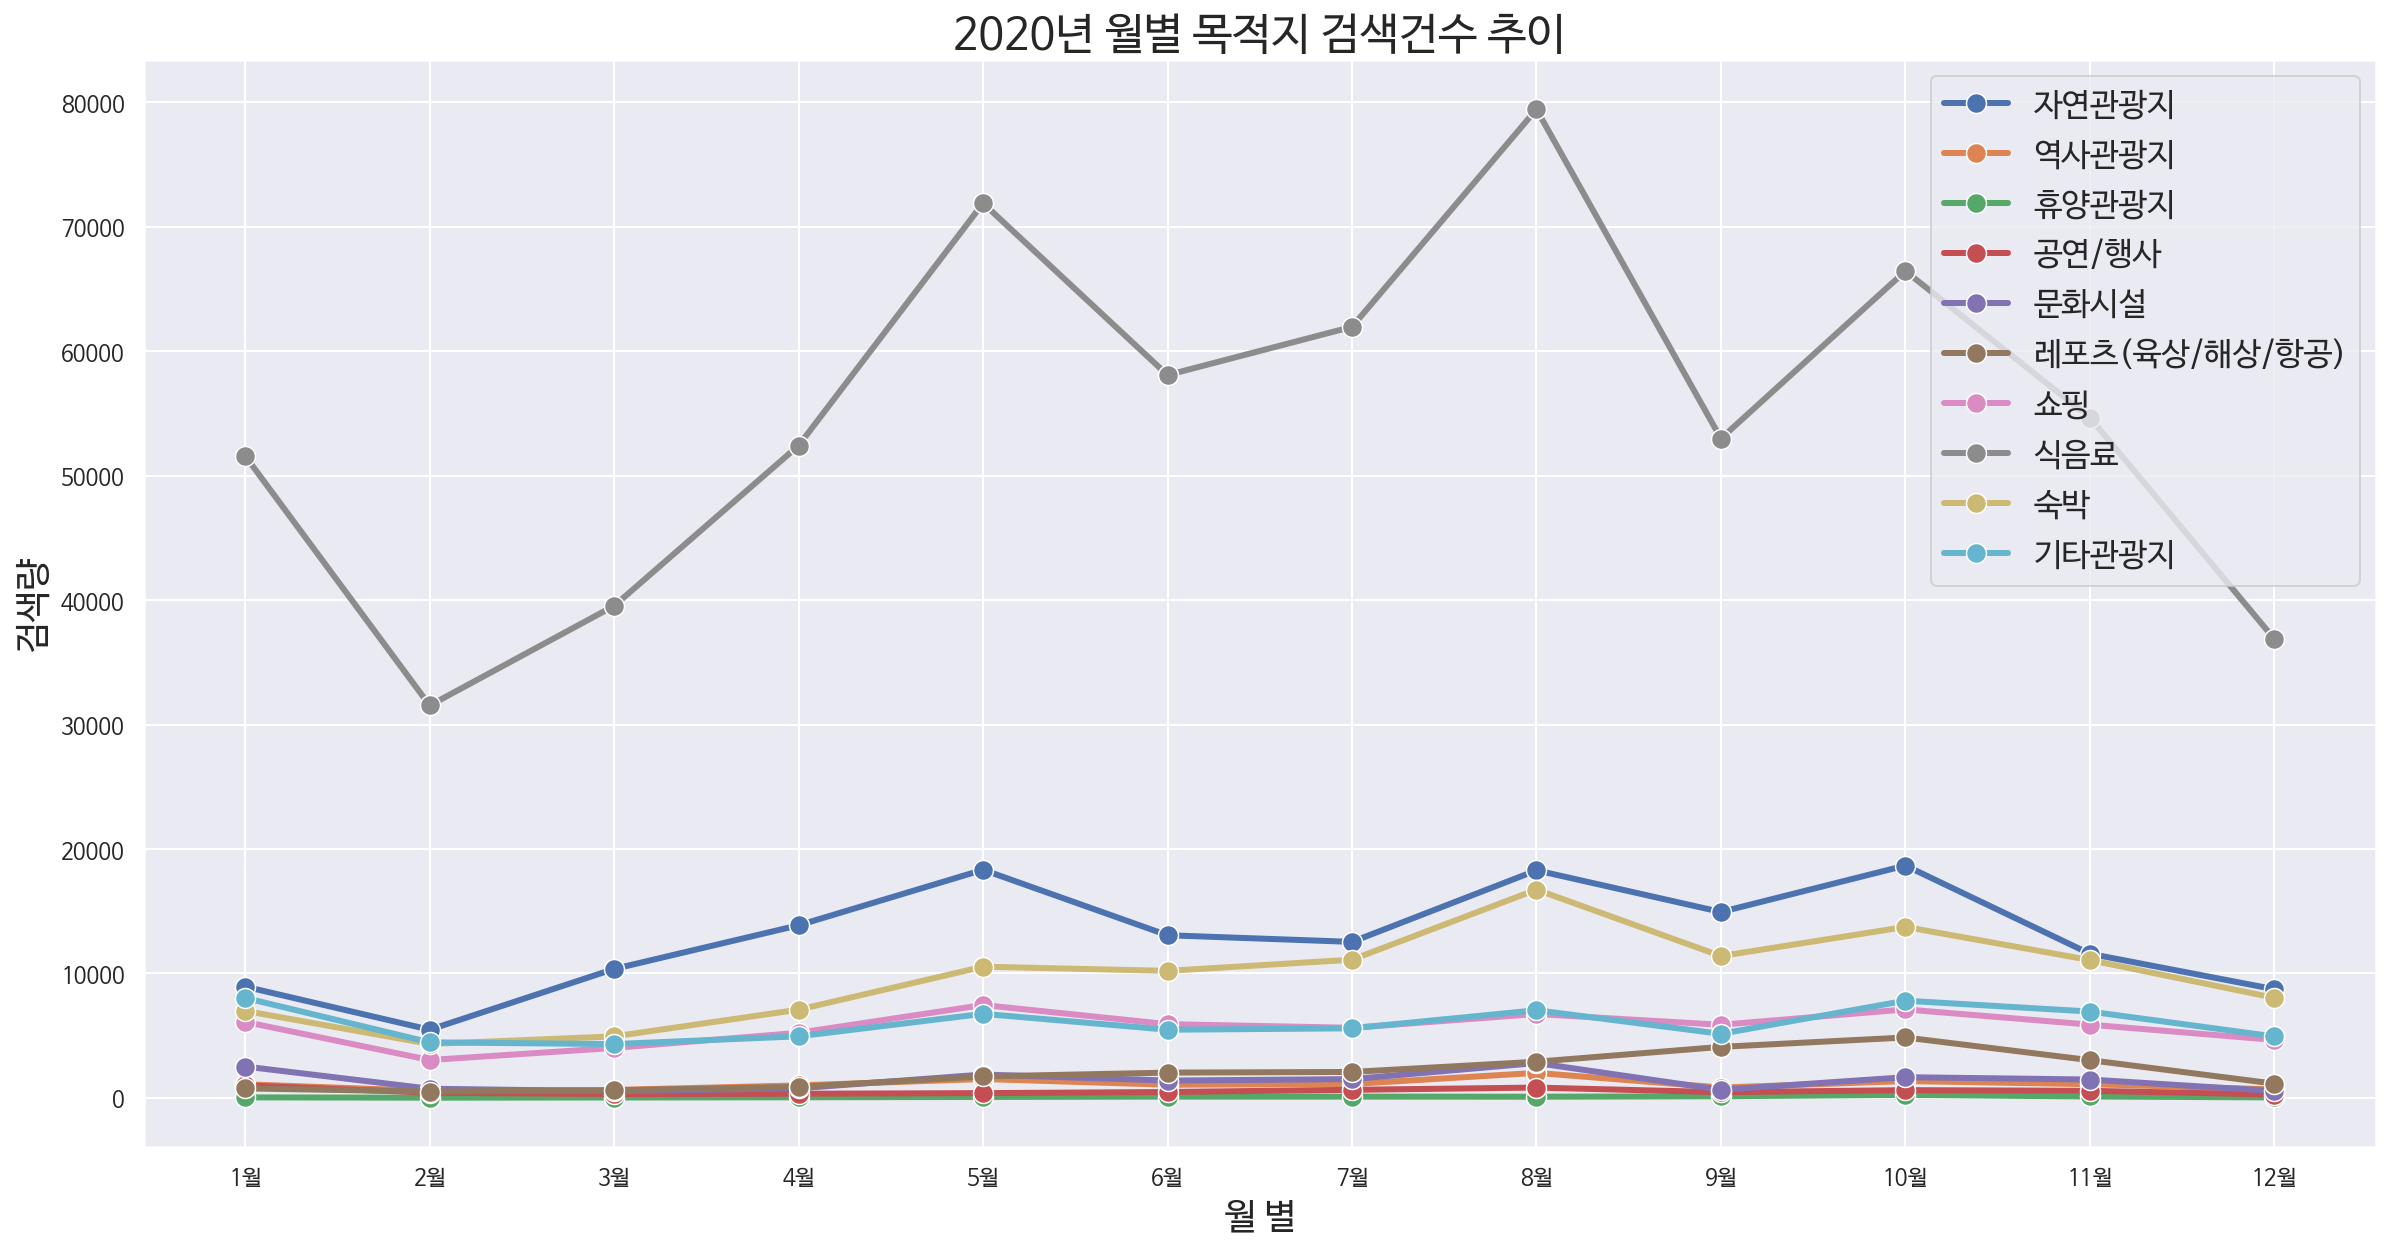

In [35]:
sns.lineplot(x=final7['월'], y =final7['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final7['월'], y =final7['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('2020년 월별 목적지 검색건수 추이', fontsize=22)
plt.legend(final7.columns[1:],fontsize=16)
plt.show()

- 2021년 월별 목적지 검색량 추이

In [36]:
seven = train2.iloc[2:,73:79]

nature = seven.iloc[[0],]
hist = seven.iloc[[1],]
rest = seven.iloc[[2],]
show = seven.iloc[[3],]
cult = seven.iloc[[4],]
sport = seven.iloc[[5],]
shop = seven.iloc[[6],]
food = seven.iloc[[7],]
sleep = seven.iloc[[8],]
other = seven.iloc[[9],]

In [37]:
y1 = nature.iloc[:,0:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,0:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,0:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,0:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,0:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,0:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,0:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,0:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,0:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,0:]
y10 = y10.iloc[0,:].values

x2 = ['1월','2월','3월','4월','5월','6월']
final8 = pd.DataFrame({"월":x2,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })
final8

,월,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
0,1월,"7,869",720,55,281,729,634,"4,762","38,568","6,768","4,436"
1,2월,"10,994","1,137",138,366,"1,391",811,"5,664","49,890","9,042","6,071"
2,3월,"10,973",991,96,451,"1,143",964,"6,273","51,729","9,430","6,036"
3,4월,"14,617","1,398",130,526,"1,081","1,459","5,733","53,624","11,194","7,365"
4,5월,"17,003","1,737",283,616,"1,669","2,207","7,060","66,080","13,103","8,487"
5,6월,"14,458","1,313",219,679,"1,375","2,114","5,969","59,736","12,508","7,322"


In [38]:
final8['자연관광지'] = final8['자연관광지'].map(lambda x: re.sub(r',', '', x))
final8['역사관광지'] = final8['역사관광지'].map(lambda x: re.sub(r',', '', x))
final8['휴양관광지'] = final8['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final8['공연/행사'] = final8['공연/행사'].map(lambda x: re.sub(r',', '', x))
final8['문화시설'] = final8['문화시설'].map(lambda x: re.sub(r',', '', x))
final8['레포츠(육상/해상/항공)'] = final8['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final8['쇼핑'] = final8['쇼핑'].map(lambda x: re.sub(r',', '', x))
final8['식음료'] = final8['식음료'].map(lambda x: re.sub(r',', '', x))
final8['숙박'] = final8['숙박'].map(lambda x: re.sub(r',', '', x))
final8['기타관광지'] = final8['기타관광지'].map(lambda x: re.sub(r',', '', x))

final8['자연관광지'] = final8['자연관광지'].apply(pd.to_numeric)
final8['역사관광지'] = final8['역사관광지'].apply(pd.to_numeric)
final8['휴양관광지'] = final8['휴양관광지'].apply(pd.to_numeric)
final8['공연/행사'] = final8['공연/행사'].apply(pd.to_numeric)
final8['문화시설'] = final8['문화시설'].apply(pd.to_numeric)
final8['레포츠(육상/해상/항공)'] = final8['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final8['쇼핑'] = final8['쇼핑'].apply(pd.to_numeric)
final8['식음료'] = final8['식음료'].apply(pd.to_numeric)
final8['숙박'] = final8['숙박'].apply(pd.to_numeric)
final8['기타관광지'] = final8['기타관광지'].apply(pd.to_numeric)

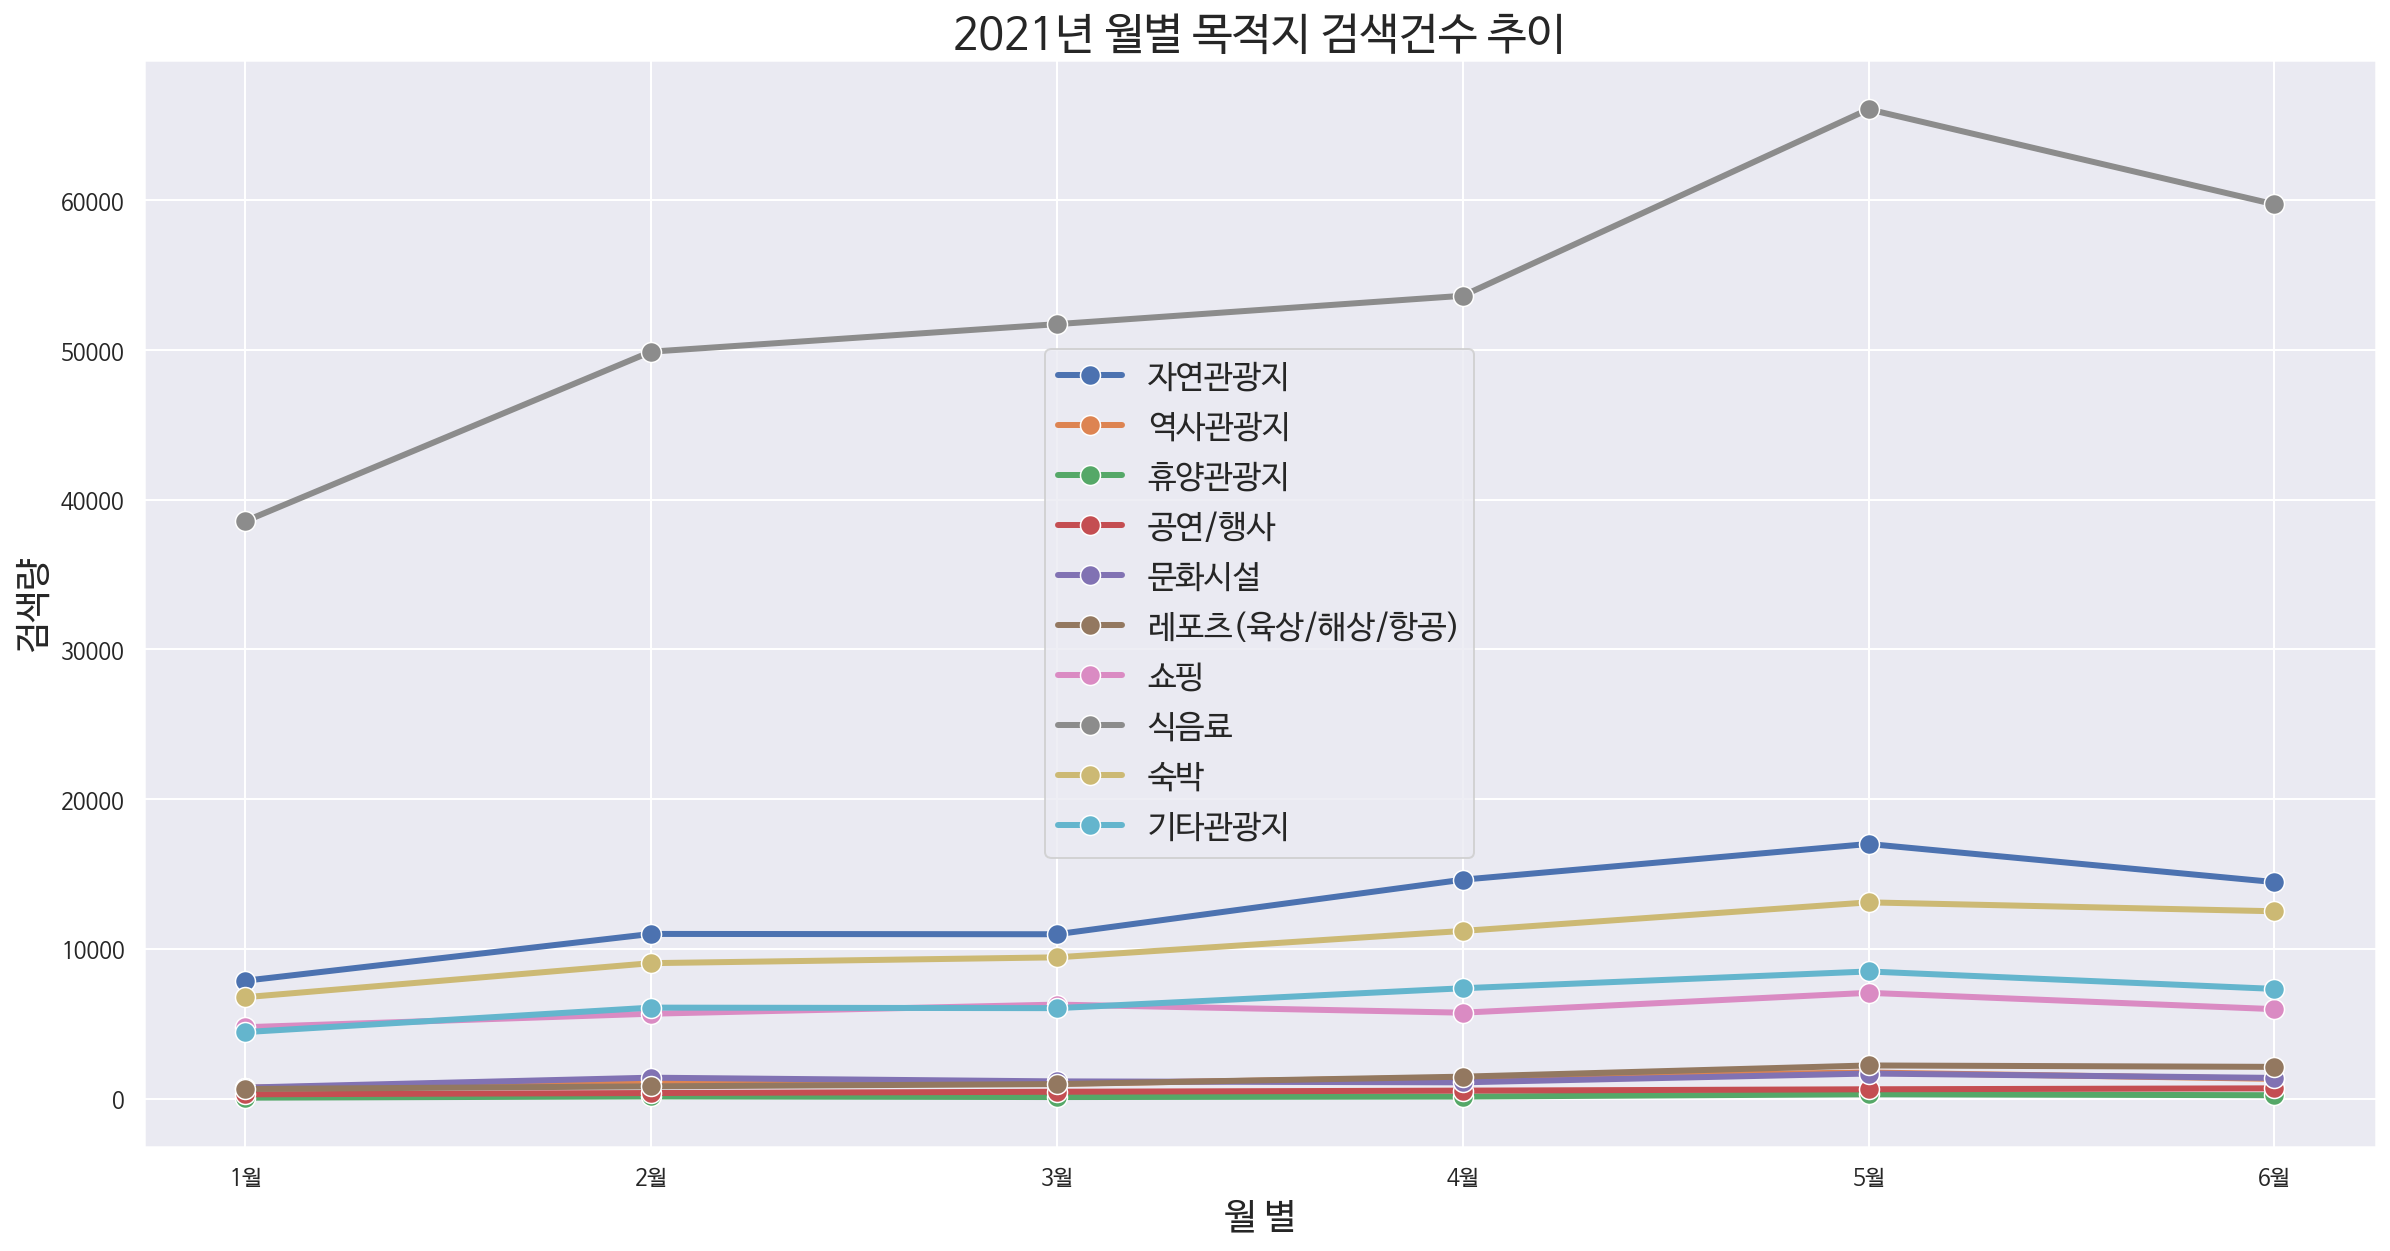

In [39]:
sns.lineplot(x=final8['월'], y =final8['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final8['월'], y =final8['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('2021년 월별 목적지 검색건수 추이', fontsize=22)
plt.legend(final8.columns[1:],fontsize=16)
plt.show()

# 월별 평균 목적지 검색량 추이

In [40]:
final_real = final2+final3+final4+final5+final6+final7

final_real['자연관광지'] = final_real['자연관광지']/6
final_real['역사관광지'] = final_real['역사관광지']/6
final_real['휴양관광지'] = final_real['휴양관광지']/6
final_real['공연/행사'] = final_real['공연/행사']/6
final_real['문화시설'] = final_real['문화시설']/6
final_real['레포츠(육상/해상/항공)'] = final_real['레포츠(육상/해상/항공)']/6
final_real['쇼핑'] = final_real['쇼핑']/6
final_real['식음료'] = final_real['식음료']/6
final_real['숙박'] = final_real['숙박']/6
final_real['기타관광지'] = final_real['기타관광지']/6

final_real = final_real.set_index('월')
final_real.index = x
final_real

,자연관광지,역사관광지,휴양관광지,공연/행사,문화시설,레포츠(육상/해상/항공),쇼핑,식음료,숙박,기타관광지
1월,4677.666667,1008.666667,33.166667,351.500000,1302.166667,408.333333,2475.000000,28218.666667,4034.000000,4452.333333
2월,4435.333333,1043.000000,24.333333,337.666667,1240.500000,329.333333,2100.000000,26124.666667,4349.333333,4237.500000
3월,5973.500000,966.833333,43.666667,306.333333,1100.000000,515.833333,2343.833333,28452.666667,4154.166667,4136.833333
4월,8531.500000,981.166667,51.833333,301.500000,1029.500000,762.166667,2818.166667,31349.000000,5250.333333,4638.833333
5월,10046.166667,1385.500000,85.000000,402.833333,1694.000000,1073.666667,4318.333333,40419.666667,6903.000000,5502.833333
6월,7878.166667,957.666667,61.500000,424.000000,1250.833333,1091.833333,3223.333333,33052.166667,5764.333333,4777.666667
7월,7644.333333,989.166667,48.166667,458.833333,1449.500000,945.833333,3274.166667,35828.500000,6287.500000,5022.500000
8월,11678.500000,1641.000000,63.500000,584.166667,2692.333333,1443.333333,3949.833333,47937.000000,9319.666667,6312.500000
9월,8465.833333,844.333333,72.500000,442.166667,1076.166667,1944.166667,3514.500000,32546.666667,5927.000000,4935.666667
10월,10834.000000,1212.333333,101.333333,467.666667,1649.166667,2364.166667,3803.833333,41547.666667,8452.666667,6060.833333


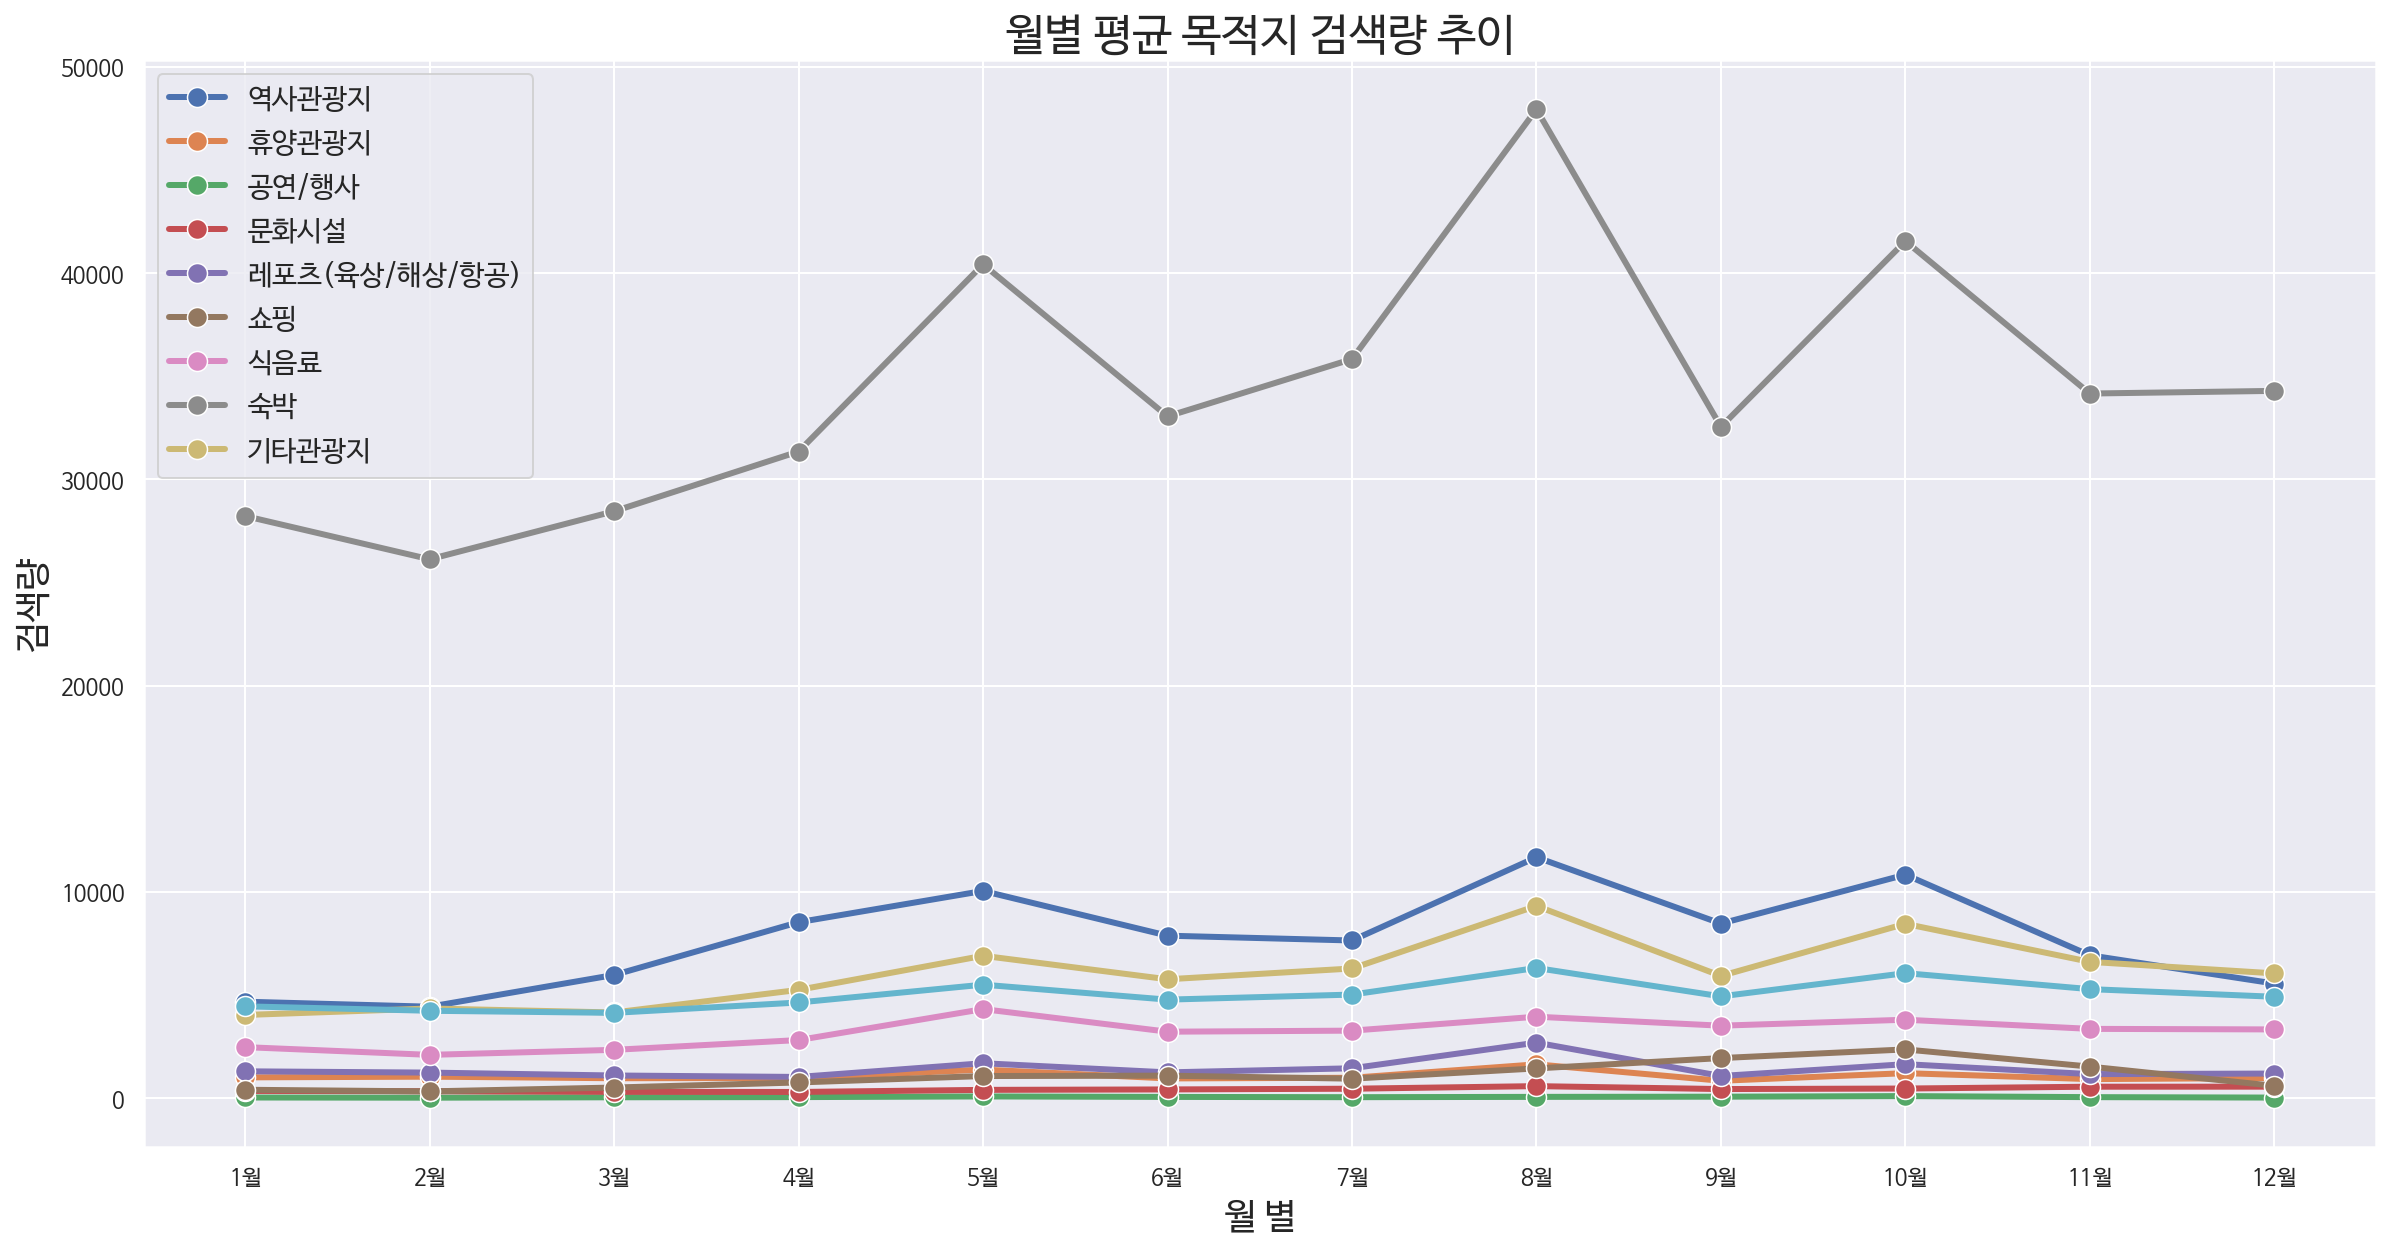

In [41]:
sns.lineplot(x=final_real.index, y =final_real['자연관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['역사관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['휴양관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['공연/행사'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['문화시설'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['레포츠(육상/해상/항공)'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['쇼핑'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['식음료'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['숙박'], linestyle='-',marker='o',linewidth = 3,markersize=10)
sns.lineplot(x=final_real.index, y =final_real['기타관광지'], linestyle='-',marker='o',linewidth = 3,markersize=10)

plt.xlabel('월 별', fontsize=18)
plt.ylabel('검색량', fontsize=18)
plt.title('월별 평균 목적지 검색량 추이', fontsize=22)
plt.legend(final_real.columns[1:],fontsize=14)
plt.show()

# 군산/통영/목포 네비게이션 검색량 비교

In [42]:
train_moc = pd.read_csv('../data/목포검색량_년도.csv', encoding ='cp949')
train_tong = pd.read_csv('../data/통영검색량_년도.csv', encoding='cp949')

In [43]:
# 목포 검색량 2015-2021년 전체 추이
nature = train_moc.loc[[1],]
hist = train_moc.loc[[2],]
rest = train_moc.loc[[3],]
show = train_moc.loc[[4],]
cult = train_moc.loc[[5],]
sport = train_moc.loc[[6],]
shop = train_moc.loc[[7],]
food = train_moc.loc[[8],]
sleep = train_moc.loc[[9],]
other = train_moc.loc[[10],]

In [44]:
x = ['2015년','2016년','2017년','2018년','2019년','2020년']
y1 = nature.iloc[:,2:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,2:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,2:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,2:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,2:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,2:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,2:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,2:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,2:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,2:]
y10 = y10.iloc[0,:].values

final2 = pd.DataFrame({"년도":x,'자연관광지':y1,'역사관광지':y2,'공연/행사':y3,'문화시설':y4,'레포츠(육상/해상/항공)' :y5,'쇼핑':y6,'식음료':y7,'숙박':y8,'기타관광지':y9,'휴양관광지':y10 })

In [45]:
final2['자연관광지'] = final2['자연관광지'].map(lambda x: re.sub(r',', '', x))
final2['역사관광지'] = final2['역사관광지'].map(lambda x: re.sub(r',', '', x))
final2['휴양관광지'] = final2['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final2['공연/행사'] = final2['공연/행사'].map(lambda x: re.sub(r',', '', x))
final2['문화시설'] = final2['문화시설'].map(lambda x: re.sub(r',', '', x))
final2['레포츠(육상/해상/항공)'] = final2['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final2['쇼핑'] = final2['쇼핑'].map(lambda x: re.sub(r',', '', x))
final2['식음료'] = final2['식음료'].map(lambda x: re.sub(r',', '', x))
final2['숙박'] = final2['숙박'].map(lambda x: re.sub(r',', '', x))
final2['기타관광지'] = final2['기타관광지'].map(lambda x: re.sub(r',', '', x))

final2['자연관광지'] = final2['자연관광지'].apply(pd.to_numeric)
final2['역사관광지'] = final2['역사관광지'].apply(pd.to_numeric)
final2['휴양관광지'] = final2['휴양관광지'].apply(pd.to_numeric)
final2['공연/행사'] = final2['공연/행사'].apply(pd.to_numeric)
final2['문화시설'] = final2['문화시설'].apply(pd.to_numeric)
final2['레포츠(육상/해상/항공)'] = final2['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final2['쇼핑'] = final2['쇼핑'].apply(pd.to_numeric)
final2['식음료'] = final2['식음료'].apply(pd.to_numeric)
final2['숙박'] = final2['숙박'].apply(pd.to_numeric)
final2['기타관광지'] = final2['기타관광지'].apply(pd.to_numeric)

In [47]:
# 통영 검색량 2015년 - 2021년 전체 추이
nature = train_tong.loc[[1],]
hist = train_tong.loc[[2],]
rest = train_tong.loc[[3],]
show = train_tong.loc[[4],]
cult = train_tong.loc[[5],]
sport = train_tong.loc[[6],]
shop = train_tong.loc[[7],]
food = train_tong.loc[[8],]
sleep = train_tong.loc[[9],]
other = train_tong.loc[[10],]

In [48]:
x = ['2015년','2016년','2017년','2018년','2019년','2020년']
y1 = nature.iloc[:,2:]
y1 = y1.iloc[0,:].values
y2 = hist.iloc[:,2:]
y2 = y2.iloc[0,:].values
y3 = rest.iloc[:,2:]
y3 = y3.iloc[0,:].values
y4 = show.iloc[:,2:]
y4 = y4.iloc[0,:].values
y5 = cult.iloc[:,2:]
y5 = y5.iloc[0,:].values
y6 = sport.iloc[:,2:]
y6 = y6.iloc[0,:].values
y7 = shop.iloc[:,2:]
y7 = y7.iloc[0,:].values
y8 = food.iloc[:,2:]
y8 = y8.iloc[0,:].values
y9 = sleep.iloc[:,2:]
y9 = y9.iloc[0,:].values
y10 = other.iloc[:,2:]
y10 = y10.iloc[0,:].values

final3 = pd.DataFrame({"년도":x,'자연관광지':y1,'역사관광지':y2,'휴양관광지':y3,'공연/행사':y4,'문화시설':y5,'레포츠(육상/해상/항공)' :y6,'쇼핑':y7,'식음료':y8,'숙박':y9,'기타관광지':y10 })

In [49]:
final3['자연관광지'] = final3['자연관광지'].map(lambda x: re.sub(r',', '', x))
final3['역사관광지'] = final3['역사관광지'].map(lambda x: re.sub(r',', '', x))
final3['휴양관광지'] = final3['휴양관광지'].map(lambda x: re.sub(r',', '', x))
final3['공연/행사'] = final3['공연/행사'].map(lambda x: re.sub(r',', '', x))
final3['문화시설'] = final3['문화시설'].map(lambda x: re.sub(r',', '', x))
final3['레포츠(육상/해상/항공)'] = final3['레포츠(육상/해상/항공)'].map(lambda x: re.sub(r',', '', x))
final3['쇼핑'] = final3['쇼핑'].map(lambda x: re.sub(r',', '', x))
final3['식음료'] = final3['식음료'].map(lambda x: re.sub(r',', '', x))
final3['숙박'] = final3['숙박'].map(lambda x: re.sub(r',', '', x))
final3['기타관광지'] = final3['기타관광지'].map(lambda x: re.sub(r',', '', x))

final3['자연관광지'] = final3['자연관광지'].apply(pd.to_numeric)
final3['역사관광지'] = final3['역사관광지'].apply(pd.to_numeric)
final3['휴양관광지'] = final3['휴양관광지'].apply(pd.to_numeric)
final3['공연/행사'] = final3['공연/행사'].apply(pd.to_numeric)
final3['문화시설'] = final3['문화시설'].apply(pd.to_numeric)
final3['레포츠(육상/해상/항공)'] = final3['레포츠(육상/해상/항공)'].apply(pd.to_numeric)
final3['쇼핑'] = final3['쇼핑'].apply(pd.to_numeric)
final3['식음료'] = final3['식음료'].apply(pd.to_numeric)
final3['숙박'] = final3['숙박'].apply(pd.to_numeric)
final3['기타관광지'] = final3['기타관광지'].apply(pd.to_numeric)

In [50]:
final=final.drop('년도', axis=1)
final2=final2.drop('년도', axis=1)
final3=final3.drop('년도', axis=1)

final['도시'] = ['군산','군산','군산','군산','군산','군산']
final2['도시']= ['목포','목포','목포','목포','목포','목포']
final3['도시']=['통영','통영','통영','통영','통영','통영']

result = pd.concat([final,final2,final3])

In [51]:
result =result.groupby('도시').mean()
result = result.transpose()
result.head()

도시,군산,목포,통영
자연관광지,92649.500000,49362.166667,82490.333333
역사관광지,12930.666667,891.500000,8588.666667
휴양관광지,664.833333,9.000000,59.000000
공연/행사,5191.333333,6000.000000,5001.333333
문화시설,16845.833333,13712.333333,13117.166667


각 지역별 전체 검색 합으로 나누어주기

In [52]:
result['군산'] = result['군산']/(result['군산'].sum())
result['통영'] = result['통영']/(result['통영'].sum())
result['목포'] = result['목포']/(result['목포'].sum())
result

도시,군산,목포,통영
자연관광지,0.127421,0.130764,0.145141
역사관광지,0.017784,0.002362,0.015112
휴양관광지,0.000914,0.000024,0.000104
공연/행사,0.007140,0.015894,0.008800
문화시설,0.023168,0.036325,0.023080
레포츠(육상/해상/항공),0.017891,0.010288,0.085064
쇼핑,0.052969,0.047766,0.077849
식음료,0.569271,0.489650,0.287813
숙박,0.100537,0.110503,0.202110
기타관광지,0.082904,0.156424,0.154929


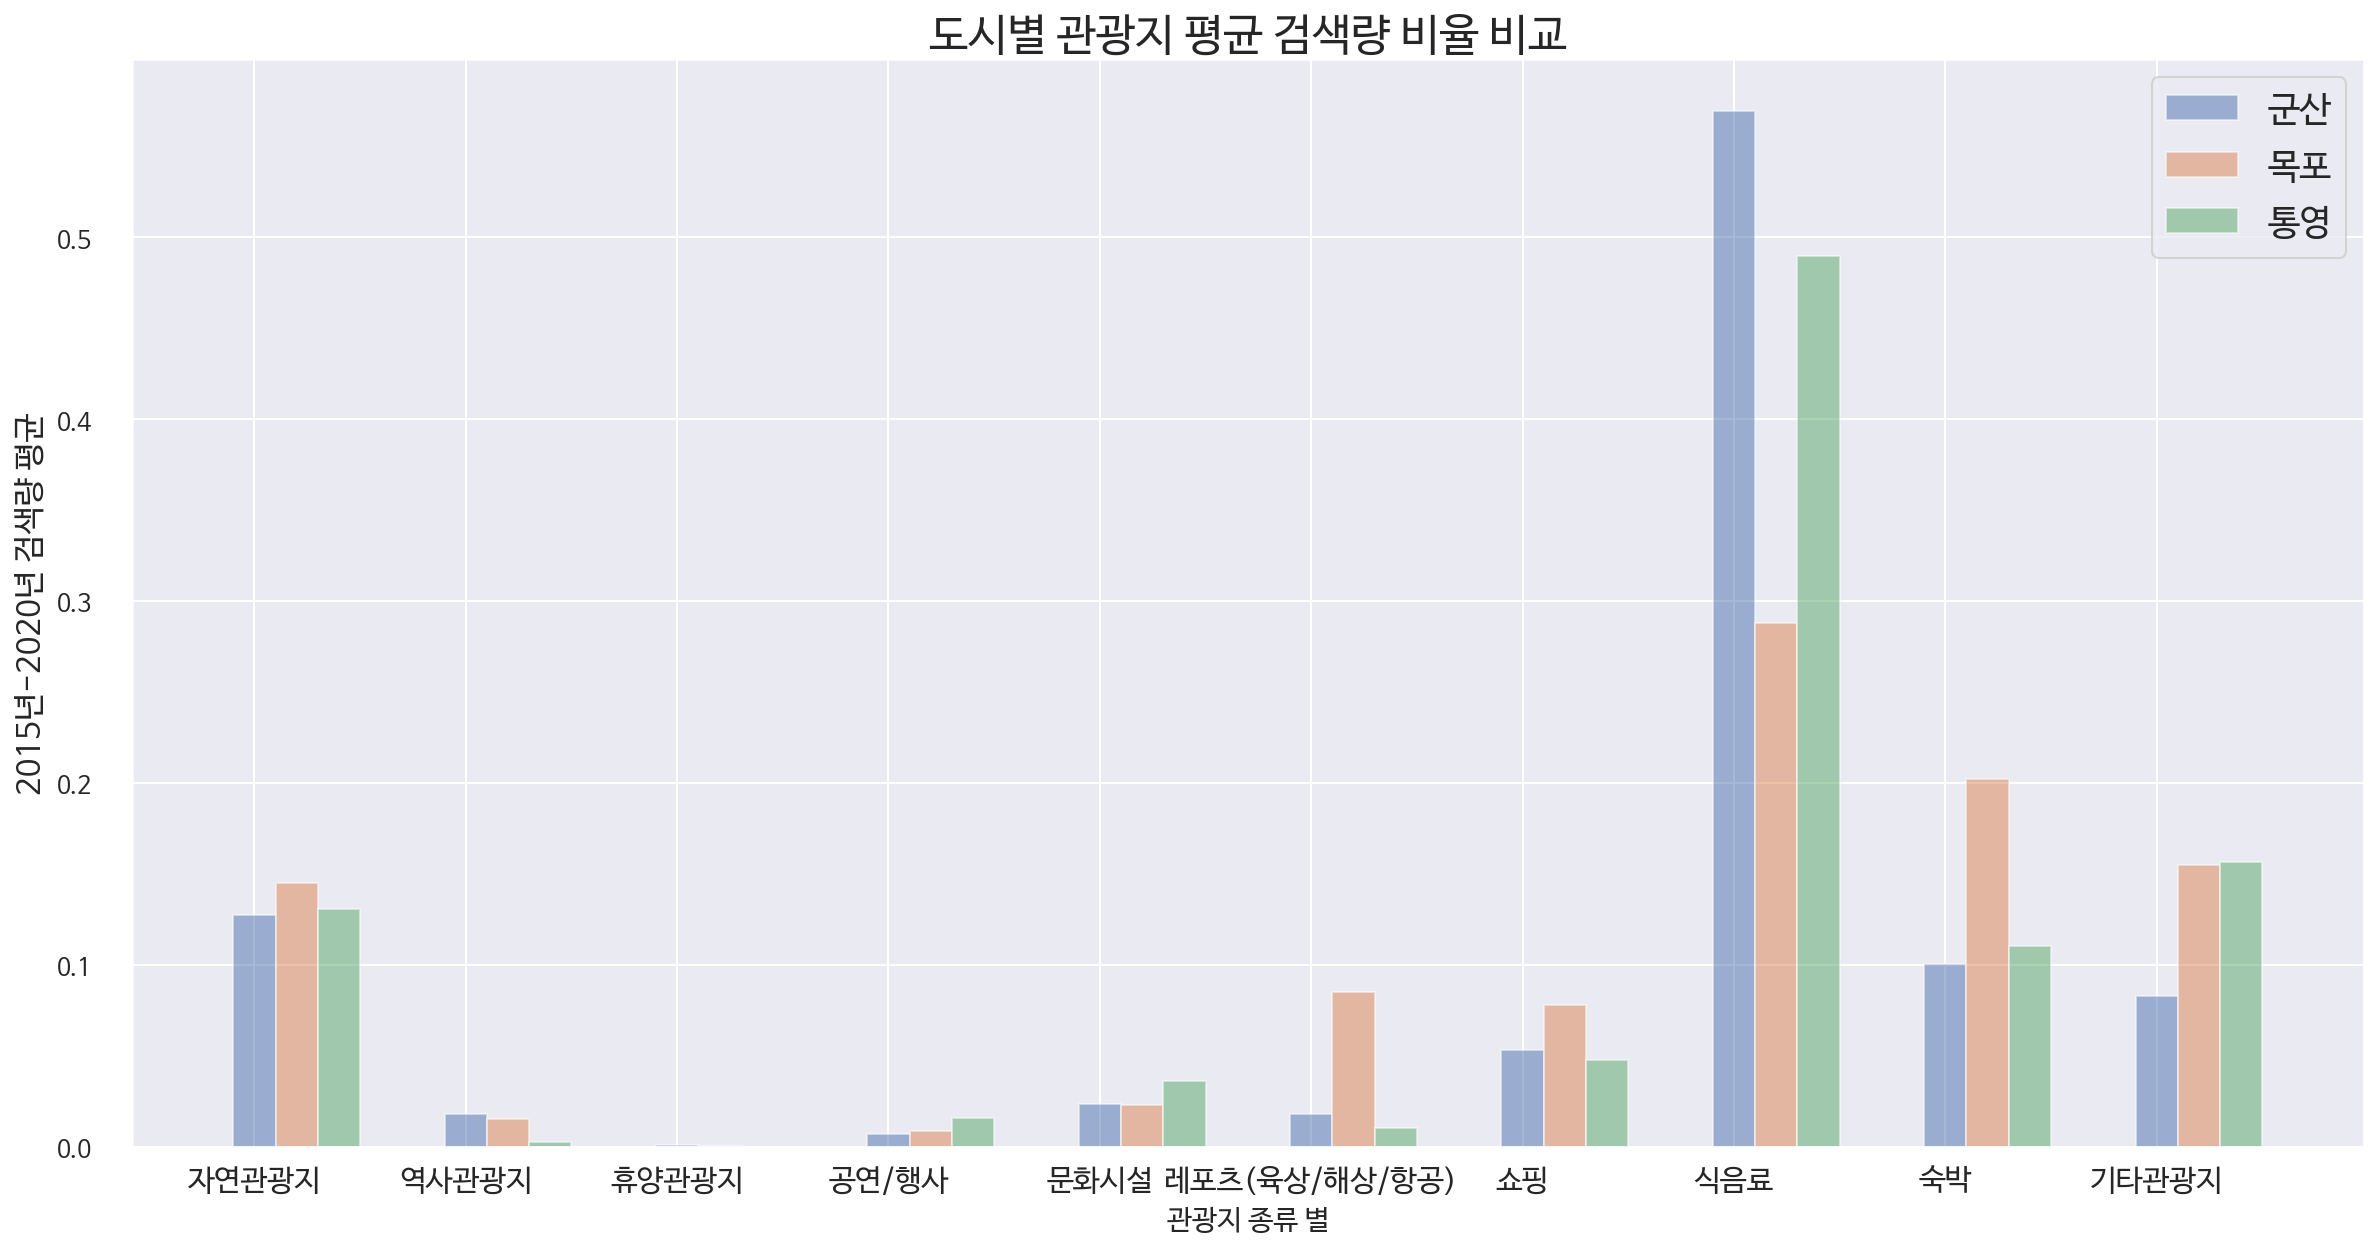

In [53]:
bar_width =0.2
alpha = 0.5
label = result.index
N = len(result.index.unique())
index = np.arange(N)

p1 = plt.bar( index, result['군산'],bar_width, alpha = alpha)
p2 = plt.bar( index +bar_width,result['통영'],bar_width,alpha = alpha)
p3 = plt.bar(index+bar_width+bar_width, result['목포'],bar_width,alpha = alpha)
plt.title('도시별 관광지 평균 검색량 비율 비교', fontsize=22)
plt.xticks(index, label, fontsize=15)
plt.xlabel('관광지 종류 별',fontsize=14)
plt.ylabel('2015년-2020년 검색량 평균',fontsize=16)
plt.legend((p1[0],p2[0],p3[0]), ('군산','목포', '통영'), fontsize=18)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=4, color='r')